In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('combined_data.xlsx')
# Drop the extra index column
df = df.drop(columns=['Unnamed: 0']) 
df

,E (GPa),σu (MPa),σf (MPa),RA (%),εf,HB,σL (MPa)
0,197,783.2,1207.0,55.1,0.800,180,260.0
1,196,905.5,1247.0,41.7,0.540,195,311.7
2,211,821.0,1128.0,49.6,0.700,238,254.5
3,202,828.5,1065.0,34.1,0.416,220,360.2
4,220,2360.0,2115.0,14.7,0.160,536,796.1
...,...,...,...,...,...,...,...
166,205,565.0,931.0,64.0,1.030,159,205.1
167,205,565.0,1000.0,69.0,1.190,150,196.6
168,205,440.0,752.0,65.0,1.060,150,210.5
169,205,530.0,1000.0,72.0,1.240,156,235.5


## Analyzing the dataset

### 1. Checking for any missing value

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   E (GPa)   171 non-null    int64  
 1   σu (MPa)  171 non-null    float64
 2   σf (MPa)  171 non-null    float64
 3   RA (%)    171 non-null    float64
 4   εf        171 non-null    float64
 5   HB        171 non-null    int64  
 6   σL (MPa)  171 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 9.5 KB


### 2. Finding the correlation between target and features

In [4]:
# Separate features and target
features = df.drop(columns=["σL (MPa)"])  # Features
target = df["σL (MPa)"]  # Target

In [5]:
# Correlation analysis
correlation = features.corrwith(target)
print("Correlation with σL (MPa):\n", correlation)

Correlation with σL (MPa):
 E (GPa)    -0.184114
σu (MPa)    0.917524
σf (MPa)    0.789047
RA (%)     -0.392341
εf         -0.432181
HB          0.931089
dtype: float64


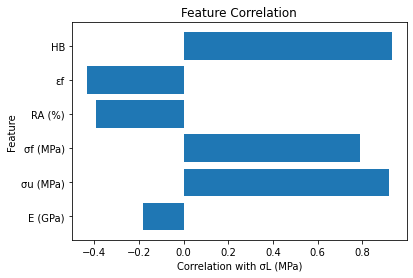

In [6]:
# Plot correlation
plt.barh(features.columns, correlation)
plt.xlabel("Correlation with σL (MPa)")
plt.ylabel("Feature")
plt.title("Feature Correlation")
plt.show()

### uts, f, e for Model 1

### Creating the variation of each of the input parameters

In [7]:
# Removing the unecessary features
df = df.drop(columns = ['E (GPa)' , 'RA (%)', 'HB'])
df

,σu (MPa),σf (MPa),εf,σL (MPa)
0,783.2,1207.0,0.800,260.0
1,905.5,1247.0,0.540,311.7
2,821.0,1128.0,0.700,254.5
3,828.5,1065.0,0.416,360.2
4,2360.0,2115.0,0.160,796.1
...,...,...,...,...
166,565.0,931.0,1.030,205.1
167,565.0,1000.0,1.190,196.6
168,440.0,752.0,1.060,210.5
169,530.0,1000.0,1.240,235.5


In [8]:
# For uts
df['exp_σu'] = df['σu (MPa)'].apply(lambda x: np.exp(0.0008 * x))
df['log_σu'] = df['σu (MPa)'].apply(lambda x: np.log(x))

# For sigmaf
df['exp_σf'] = df['σf (MPa)'].apply(lambda x: np.exp(0.0006 * x))
df['log_σf'] = df['σf (MPa)'].apply(lambda x: np.log(x))

# for episolonf
df['exp_εf'] = df['εf'].apply(lambda x: np.exp(-0.73 * x))
df['log_εf'] = df['εf'].apply(lambda x: np.log(x))


# Reordering dataframe
df = df[['σu (MPa)','log_σu','exp_σu','σf (MPa)', 'log_σf', 'exp_σf' , 'εf' , 'log_εf' , 'exp_εf' , 'σL (MPa)']]

In [63]:
df

,σu (MPa),log_σu,exp_σu,σf (MPa),log_σf,exp_σf,εf,log_εf,exp_εf,σL (MPa)
0,783.2,6.663388,1.871163,1207.0,7.095893,2.063080,0.800,-0.223144,0.557663,260.0
1,905.5,6.808487,2.063493,1247.0,7.128496,2.113193,0.540,-0.616186,0.674219,311.7
2,821.0,6.710523,1.928611,1128.0,7.028201,1.967571,0.700,-0.356675,0.599895,254.5
3,828.5,6.719617,1.940217,1065.0,6.970730,1.894585,0.416,-0.877070,0.738097,360.2
4,2360.0,7.766417,6.606143,2115.0,7.656810,3.557293,0.160,-1.832581,0.889763,796.1
...,...,...,...,...,...,...,...,...,...,...
166,565.0,6.336826,1.571452,931.0,6.836259,1.748223,1.030,0.029559,0.471470,205.1
167,565.0,6.336826,1.571452,1000.0,6.907755,1.822119,1.190,0.173953,0.419497,196.6
168,440.0,6.086775,1.421909,752.0,6.622736,1.570195,1.060,0.058269,0.461257,210.5
169,530.0,6.272877,1.528062,1000.0,6.907755,1.822119,1.240,0.215111,0.404461,235.5


In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Define your input parameters and their variations
params = {
    'x1': ['σu (MPa)', 'log_σu', 'exp_σu'],
    'x2': ['σf (MPa)', 'log_σf', 'exp_σf'],
    'x3': ['εf', 'log_εf', 'exp_εf']
}

#Results dictionary
results = {}

best_accuracy = 0
best_combination = None

# Generate all possible combinations of parameter variations
for x1_variation in params['x1']:
    for x2_variation in params['x2']:
        for x3_variation in params['x3']:
            combination = x1_variation + " , " + x2_variation + " , " + x3_variation
            print(combination)
            # Prepare dataset with the current combination
            X = df[[x1_variation , x2_variation , x3_variation]]
            y = df["σL (MPa)"]
            
            #Test-train split
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            
            # Standardize features
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
            
            # Creating a basic neural network model
            model = Sequential([
            Dense(8, activation='relu', input_shape=(X_train_scaled.shape[1],)),
            Dense(7, activation='relu'),
            Dense(4, activation='relu'),
            #     Dense(10, activation='relu'),
            #     Dense(10, activation='relu'),
            Dense(1)  # Output layer
            ])
            
            # Compile the model
            model.compile(optimizer='adam', loss='mean_squared_error')
            # Define early stopping callback
            early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
            # Train the model with early stopping
            history = model.fit(X_train_scaled, y_train, epochs=1000, batch_size=8, validation_split=0.2, callbacks=[early_stopping], verbose=1)
            # Predict on test set
            y_pred = model.predict(X_test_scaled)

            # Calculate and print accuracy
            accuracy = (1 - mean_squared_error(y_test, y_pred) / np.var(y_test)) * 100
            print("Accuracy:", accuracy)
            
            #Putting the results in the dictionary
            results[combination] = accuracy
            
            
            # Check if current combination gives better accuracy
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_combination = (x1_variation, x2_variation, x3_variation)

# Print the best combination and its accuracy
print("Best Combination:", best_combination)
print("Best Accuracy:", best_accuracy)

σu (MPa) , σf (MPa) , εf
Epoch 1/1000
14/14 [==============================] - 1s 24ms/step - loss: 261537.0312 - val_loss: 230483.6719
Epoch 2/1000
14/14 [==============================] - 0s 4ms/step - loss: 261427.2812 - val_loss: 230396.6719
Epoch 3/1000
14/14 [==============================] - 0s 4ms/step - loss: 261331.3906 - val_loss: 230319.6094
Epoch 4/1000
14/14 [==============================] - 0s 4ms/step - loss: 261233.6719 - val_loss: 230243.5000
Epoch 5/1000
14/14 [==============================] - 0s 4ms/step - loss: 261127.7344 - val_loss: 230158.0781
Epoch 6/1000
14/14 [==============================] - 0s 4ms/step - loss: 261009.4688 - val_loss: 230060.3594
Epoch 7/1000
14/14 [==============================] - 0s 4ms/step - loss: 260864.5625 - val_loss: 229955.1094
Epoch 8/1000
14/14 [==============================] - 0s 4ms/step - loss: 260719.7812 - val_loss: 229827.1094
Epoch 9/1000
14/14 [==============================] - 0s 4ms/step - loss: 260538.0781 - val_lo

14/14 [==============================] - 0s 5ms/step - loss: 30640.1738 - val_loss: 34176.3164
Epoch 76/1000
14/14 [==============================] - 0s 4ms/step - loss: 29973.3594 - val_loss: 33430.3398
Epoch 77/1000
14/14 [==============================] - 0s 4ms/step - loss: 29426.5117 - val_loss: 32701.5723
Epoch 78/1000
14/14 [==============================] - 0s 4ms/step - loss: 28816.3613 - val_loss: 32086.6914
Epoch 79/1000
14/14 [==============================] - 0s 4ms/step - loss: 28273.3359 - val_loss: 31390.5723
Epoch 80/1000
14/14 [==============================] - 0s 5ms/step - loss: 27731.5273 - val_loss: 30749.0352
Epoch 81/1000
14/14 [==============================] - 0s 5ms/step - loss: 27202.2051 - val_loss: 30192.5664
Epoch 82/1000
14/14 [==============================] - 0s 5ms/step - loss: 26754.2598 - val_loss: 29557.4375
Epoch 83/1000
14/14 [==============================] - 0s 5ms/step - loss: 26242.8145 - val_loss: 29038.3086
Epoch 84/1000
14/14 [============

Epoch 150/1000
14/14 [==============================] - 0s 4ms/step - loss: 10370.3828 - val_loss: 10340.7578
Epoch 151/1000
14/14 [==============================] - 0s 4ms/step - loss: 10252.3730 - val_loss: 10204.6123
Epoch 152/1000
14/14 [==============================] - 0s 4ms/step - loss: 10160.3135 - val_loss: 9967.8154
Epoch 153/1000
14/14 [==============================] - 0s 6ms/step - loss: 10040.2139 - val_loss: 9884.7900
Epoch 154/1000
14/14 [==============================] - 0s 6ms/step - loss: 9931.4062 - val_loss: 9792.9434
Epoch 155/1000
14/14 [==============================] - 0s 6ms/step - loss: 9817.5361 - val_loss: 9610.0059
Epoch 156/1000
14/14 [==============================] - 0s 6ms/step - loss: 9703.1973 - val_loss: 9532.7207
Epoch 157/1000
14/14 [==============================] - 0s 6ms/step - loss: 9584.4512 - val_loss: 9401.8096
Epoch 158/1000
14/14 [==============================] - 0s 6ms/step - loss: 9490.9521 - val_loss: 9239.6162
Epoch 159/1000
14/14 [

Epoch 226/1000
14/14 [==============================] - 0s 10ms/step - loss: 5306.7090 - val_loss: 5717.6987
Epoch 227/1000
14/14 [==============================] - 0s 9ms/step - loss: 5277.7988 - val_loss: 5706.1138
Epoch 228/1000
14/14 [==============================] - 0s 7ms/step - loss: 5254.6401 - val_loss: 5707.1362
Epoch 229/1000
14/14 [==============================] - 0s 7ms/step - loss: 5217.0645 - val_loss: 5623.6084
Epoch 230/1000
14/14 [==============================] - 0s 7ms/step - loss: 5180.7915 - val_loss: 5607.7734
Epoch 231/1000
14/14 [==============================] - 0s 7ms/step - loss: 5143.1348 - val_loss: 5582.2690
Epoch 232/1000
14/14 [==============================] - 0s 7ms/step - loss: 5117.6245 - val_loss: 5584.2783
Epoch 233/1000
14/14 [==============================] - 0s 7ms/step - loss: 5096.7837 - val_loss: 5584.3862
Epoch 234/1000
14/14 [==============================] - 0s 7ms/step - loss: 5071.4214 - val_loss: 5589.4966
Epoch 235/1000
14/14 [=====

14/14 [==============================] - 0s 4ms/step - loss: 20131.0977 - val_loss: 22949.9961
Epoch 60/1000
14/14 [==============================] - 0s 4ms/step - loss: 19660.8281 - val_loss: 22320.1855
Epoch 61/1000
14/14 [==============================] - 0s 4ms/step - loss: 19234.1484 - val_loss: 21922.7969
Epoch 62/1000
14/14 [==============================] - 0s 5ms/step - loss: 18806.3379 - val_loss: 21200.2520
Epoch 63/1000
14/14 [==============================] - 0s 5ms/step - loss: 18384.2031 - val_loss: 20631.6152
Epoch 64/1000
14/14 [==============================] - 0s 5ms/step - loss: 18027.8711 - val_loss: 20247.6855
Epoch 65/1000
14/14 [==============================] - 0s 5ms/step - loss: 17679.3066 - val_loss: 19740.4004
Epoch 66/1000
14/14 [==============================] - 0s 5ms/step - loss: 17312.3398 - val_loss: 19271.3242
Epoch 67/1000
14/14 [==============================] - 0s 5ms/step - loss: 17003.2012 - val_loss: 18752.2910
Epoch 68/1000
14/14 [============

14/14 [==============================] - 0s 4ms/step - loss: 7028.5190 - val_loss: 8149.1885
Epoch 135/1000
14/14 [==============================] - 0s 4ms/step - loss: 6980.6035 - val_loss: 8023.6841
Epoch 136/1000
14/14 [==============================] - 0s 4ms/step - loss: 6922.7500 - val_loss: 7973.6514
Epoch 137/1000
14/14 [==============================] - 0s 5ms/step - loss: 6866.7285 - val_loss: 7922.1948
Epoch 138/1000
14/14 [==============================] - 0s 4ms/step - loss: 6811.2539 - val_loss: 7952.6323
Epoch 139/1000
14/14 [==============================] - 0s 4ms/step - loss: 6749.8501 - val_loss: 7872.4170
Epoch 140/1000
14/14 [==============================] - 0s 4ms/step - loss: 6696.5708 - val_loss: 7899.7026
Epoch 141/1000
14/14 [==============================] - 0s 4ms/step - loss: 6653.6748 - val_loss: 7852.9263
Epoch 142/1000
14/14 [==============================] - 0s 4ms/step - loss: 6592.9536 - val_loss: 7791.5820
Epoch 143/1000
14/14 [=====================

Epoch 12/1000
14/14 [==============================] - 0s 4ms/step - loss: 258540.2812 - val_loss: 227704.5312
Epoch 13/1000
14/14 [==============================] - 0s 4ms/step - loss: 257940.5312 - val_loss: 227175.1719
Epoch 14/1000
14/14 [==============================] - 0s 4ms/step - loss: 257268.3281 - val_loss: 226547.2031
Epoch 15/1000
14/14 [==============================] - 0s 4ms/step - loss: 256462.2344 - val_loss: 225838.7812
Epoch 16/1000
14/14 [==============================] - 0s 4ms/step - loss: 255558.2344 - val_loss: 225004.7812
Epoch 17/1000
14/14 [==============================] - 0s 9ms/step - loss: 254466.3594 - val_loss: 224038.4844
Epoch 18/1000
14/14 [==============================] - 0s 9ms/step - loss: 253212.4688 - val_loss: 222910.6094
Epoch 19/1000
14/14 [==============================] - 0s 9ms/step - loss: 251759.6719 - val_loss: 221600.8594
Epoch 20/1000
14/14 [==============================] - 0s 9ms/step - loss: 250075.7656 - val_loss: 220109.9219
E

14/14 [==============================] - 0s 5ms/step - loss: 18811.4082 - val_loss: 21472.5996
Epoch 87/1000
14/14 [==============================] - 0s 5ms/step - loss: 18504.4824 - val_loss: 21135.9590
Epoch 88/1000
14/14 [==============================] - 0s 5ms/step - loss: 18209.4863 - val_loss: 20831.5586
Epoch 89/1000
14/14 [==============================] - 0s 5ms/step - loss: 17935.4648 - val_loss: 20532.4961
Epoch 90/1000
14/14 [==============================] - 0s 5ms/step - loss: 17663.0020 - val_loss: 20186.5488
Epoch 91/1000
14/14 [==============================] - 0s 5ms/step - loss: 17405.7012 - val_loss: 19871.6719
Epoch 92/1000
14/14 [==============================] - 0s 6ms/step - loss: 17156.7422 - val_loss: 19624.5352
Epoch 93/1000
14/14 [==============================] - 0s 6ms/step - loss: 16886.0098 - val_loss: 19455.6992
Epoch 94/1000
14/14 [==============================] - 0s 6ms/step - loss: 16671.7559 - val_loss: 19154.7051
Epoch 95/1000
14/14 [============

Epoch 161/1000
14/14 [==============================] - 0s 4ms/step - loss: 8265.7275 - val_loss: 9607.8330
Epoch 162/1000
14/14 [==============================] - 0s 4ms/step - loss: 8200.7510 - val_loss: 9504.7871
Epoch 163/1000
14/14 [==============================] - 0s 4ms/step - loss: 8139.1973 - val_loss: 9395.7422
Epoch 164/1000
14/14 [==============================] - 0s 4ms/step - loss: 8070.5122 - val_loss: 9392.5439
Epoch 165/1000
14/14 [==============================] - 0s 4ms/step - loss: 8022.9995 - val_loss: 9348.0381
Epoch 166/1000
14/14 [==============================] - 0s 4ms/step - loss: 7949.4458 - val_loss: 9187.2402
Epoch 167/1000
14/14 [==============================] - 0s 4ms/step - loss: 7893.5352 - val_loss: 9096.1855
Epoch 168/1000
14/14 [==============================] - 0s 4ms/step - loss: 7836.5425 - val_loss: 9037.0400
Epoch 169/1000
14/14 [==============================] - 0s 4ms/step - loss: 7779.2002 - val_loss: 8977.5693
Epoch 170/1000
14/14 [======

Epoch 237/1000
14/14 [==============================] - 0s 8ms/step - loss: 5582.8750 - val_loss: 6685.2729
Epoch 238/1000
14/14 [==============================] - 0s 9ms/step - loss: 5562.4521 - val_loss: 6682.4224
Epoch 239/1000
14/14 [==============================] - 0s 10ms/step - loss: 5550.5400 - val_loss: 6638.0698
Epoch 240/1000
14/14 [==============================] - 0s 9ms/step - loss: 5526.3306 - val_loss: 6646.7593
Epoch 241/1000
14/14 [==============================] - 0s 9ms/step - loss: 5521.4727 - val_loss: 6699.1924
Epoch 242/1000
14/14 [==============================] - 0s 10ms/step - loss: 5502.8721 - val_loss: 6652.1416
Epoch 243/1000
14/14 [==============================] - 0s 10ms/step - loss: 5486.0386 - val_loss: 6536.5977
Epoch 244/1000
14/14 [==============================] - 0s 10ms/step - loss: 5475.8042 - val_loss: 6531.9917
Epoch 245/1000
14/14 [==============================] - 0s 11ms/step - loss: 5455.4800 - val_loss: 6501.1050
Epoch 246/1000
14/14 [=

Epoch 38/1000
14/14 [==============================] - 0s 10ms/step - loss: 205099.8281 - val_loss: 183209.5156
Epoch 39/1000
14/14 [==============================] - 0s 10ms/step - loss: 199741.1719 - val_loss: 178747.7656
Epoch 40/1000
14/14 [==============================] - 0s 10ms/step - loss: 193866.8594 - val_loss: 174213.0312
Epoch 41/1000
14/14 [==============================] - 0s 9ms/step - loss: 187998.3906 - val_loss: 169258.9688
Epoch 42/1000
14/14 [==============================] - 0s 9ms/step - loss: 181679.9219 - val_loss: 164134.2812
Epoch 43/1000
14/14 [==============================] - 0s 9ms/step - loss: 175228.4688 - val_loss: 158808.1719
Epoch 44/1000
14/14 [==============================] - 0s 9ms/step - loss: 168194.3906 - val_loss: 153637.6250
Epoch 45/1000
14/14 [==============================] - 0s 9ms/step - loss: 161402.7812 - val_loss: 148065.6562
Epoch 46/1000
14/14 [==============================] - 0s 9ms/step - loss: 154397.5781 - val_loss: 142348.218

14/14 [==============================] - 0s 6ms/step - loss: 18274.8574 - val_loss: 21744.7715
Epoch 113/1000
14/14 [==============================] - 0s 6ms/step - loss: 18031.2949 - val_loss: 21486.8242
Epoch 114/1000
14/14 [==============================] - 0s 6ms/step - loss: 17805.2461 - val_loss: 21243.6934
Epoch 115/1000
14/14 [==============================] - 0s 6ms/step - loss: 17574.1152 - val_loss: 20955.6523
Epoch 116/1000
14/14 [==============================] - 0s 6ms/step - loss: 17363.3984 - val_loss: 20740.7715
Epoch 117/1000
14/14 [==============================] - 0s 6ms/step - loss: 17138.1348 - val_loss: 20489.9805
Epoch 118/1000
14/14 [==============================] - 0s 6ms/step - loss: 16913.5449 - val_loss: 20236.6582
Epoch 119/1000
14/14 [==============================] - 0s 6ms/step - loss: 16717.8105 - val_loss: 19907.3086
Epoch 120/1000
14/14 [==============================] - 0s 6ms/step - loss: 16480.4551 - val_loss: 19679.7012
Epoch 121/1000
14/14 [===

Epoch 187/1000
14/14 [==============================] - 0s 5ms/step - loss: 8505.2510 - val_loss: 8885.5059
Epoch 188/1000
14/14 [==============================] - 0s 5ms/step - loss: 8447.5312 - val_loss: 8770.9004
Epoch 189/1000
14/14 [==============================] - 0s 5ms/step - loss: 8393.5527 - val_loss: 8712.2695
Epoch 190/1000
14/14 [==============================] - 0s 5ms/step - loss: 8331.5273 - val_loss: 8589.9697
Epoch 191/1000
14/14 [==============================] - 0s 5ms/step - loss: 8258.1064 - val_loss: 8519.4775
Epoch 192/1000
14/14 [==============================] - 0s 5ms/step - loss: 8206.3369 - val_loss: 8460.4023
Epoch 193/1000
14/14 [==============================] - 0s 5ms/step - loss: 8149.6504 - val_loss: 8387.4453
Epoch 194/1000
14/14 [==============================] - 0s 5ms/step - loss: 8099.6040 - val_loss: 8327.3584
Epoch 195/1000
14/14 [==============================] - 0s 5ms/step - loss: 8040.3091 - val_loss: 8232.7861
Epoch 196/1000
14/14 [======

Epoch 263/1000
14/14 [==============================] - 0s 8ms/step - loss: 5428.6382 - val_loss: 5695.4951
Epoch 264/1000
14/14 [==============================] - 0s 7ms/step - loss: 5394.3896 - val_loss: 5684.9697
Epoch 265/1000
14/14 [==============================] - 0s 5ms/step - loss: 5368.6846 - val_loss: 5644.2275
Epoch 266/1000
14/14 [==============================] - 0s 4ms/step - loss: 5343.9292 - val_loss: 5680.8149
Epoch 267/1000
14/14 [==============================] - 0s 4ms/step - loss: 5308.9351 - val_loss: 5618.8994
Epoch 268/1000
14/14 [==============================] - 0s 4ms/step - loss: 5281.5596 - val_loss: 5591.3950
Epoch 269/1000
14/14 [==============================] - 0s 4ms/step - loss: 5256.0239 - val_loss: 5575.8794
Epoch 270/1000
14/14 [==============================] - 0s 4ms/step - loss: 5220.0405 - val_loss: 5574.1714
Epoch 271/1000
14/14 [==============================] - 0s 4ms/step - loss: 5209.4536 - val_loss: 5571.2837
Epoch 272/1000
14/14 [======

14/14 [==============================] - 0s 6ms/step - loss: 261005.5156 - val_loss: 230048.5312
Epoch 32/1000
14/14 [==============================] - 0s 6ms/step - loss: 260992.5000 - val_loss: 230036.0469
Epoch 33/1000
14/14 [==============================] - 0s 6ms/step - loss: 260978.9688 - val_loss: 230024.0000
Epoch 34/1000
14/14 [==============================] - 0s 6ms/step - loss: 260966.0156 - val_loss: 230011.6719
Epoch 35/1000
14/14 [==============================] - 0s 6ms/step - loss: 260952.7031 - val_loss: 229999.5781
Epoch 36/1000
14/14 [==============================] - 0s 6ms/step - loss: 260939.5625 - val_loss: 229987.3594
Epoch 37/1000
14/14 [==============================] - 0s 6ms/step - loss: 260926.4375 - val_loss: 229975.1094
Epoch 38/1000
14/14 [==============================] - 0s 6ms/step - loss: 260913.3125 - val_loss: 229962.9531
Epoch 39/1000
14/14 [==============================] - 0s 6ms/step - loss: 260900.1719 - val_loss: 229950.8438
Epoch 40/1000
1

Epoch 105/1000
14/14 [==============================] - 0s 5ms/step - loss: 260031.4844 - val_loss: 229145.8438
Epoch 106/1000
14/14 [==============================] - 0s 5ms/step - loss: 260018.3750 - val_loss: 229133.8594
Epoch 107/1000
14/14 [==============================] - 0s 5ms/step - loss: 260005.3906 - val_loss: 229121.5469
Epoch 108/1000
14/14 [==============================] - 0s 5ms/step - loss: 259992.0938 - val_loss: 229109.6250
Epoch 109/1000
14/14 [==============================] - 0s 5ms/step - loss: 259979.1094 - val_loss: 229097.2812
Epoch 110/1000
14/14 [==============================] - 0s 5ms/step - loss: 259965.9062 - val_loss: 229085.1719
Epoch 111/1000
14/14 [==============================] - 0s 5ms/step - loss: 259952.7656 - val_loss: 229073.0469
Epoch 112/1000
14/14 [==============================] - 0s 5ms/step - loss: 259939.5625 - val_loss: 229060.7656
Epoch 113/1000
14/14 [==============================] - 0s 5ms/step - loss: 259926.4219 - val_loss: 2290

14/14 [==============================] - 0s 5ms/step - loss: 259073.3125 - val_loss: 228258.1406
Epoch 179/1000
14/14 [==============================] - 0s 5ms/step - loss: 259060.2812 - val_loss: 228245.9688
Epoch 180/1000
14/14 [==============================] - 0s 5ms/step - loss: 259047.3125 - val_loss: 228233.7500
Epoch 181/1000
14/14 [==============================] - 0s 5ms/step - loss: 259034.0938 - val_loss: 228221.7969
Epoch 182/1000
14/14 [==============================] - 0s 6ms/step - loss: 259021.0938 - val_loss: 228209.7188
Epoch 183/1000
14/14 [==============================] - 0s 6ms/step - loss: 259007.8750 - val_loss: 228197.6719
Epoch 184/1000
14/14 [==============================] - 0s 6ms/step - loss: 258995.1094 - val_loss: 228185.2500
Epoch 185/1000
14/14 [==============================] - 0s 6ms/step - loss: 258981.6719 - val_loss: 228173.3594
Epoch 186/1000
14/14 [==============================] - 0s 6ms/step - loss: 258968.6406 - val_loss: 228161.1562
Epoch 1

14/14 [==============================] - 0s 5ms/step - loss: 258116.9844 - val_loss: 227372.1406
Epoch 252/1000
14/14 [==============================] - 0s 5ms/step - loss: 258103.7344 - val_loss: 227360.0469
Epoch 253/1000
14/14 [==============================] - 0s 5ms/step - loss: 258090.7812 - val_loss: 227347.9219
Epoch 254/1000
14/14 [==============================] - 0s 5ms/step - loss: 258077.6250 - val_loss: 227335.9062
Epoch 255/1000
14/14 [==============================] - 0s 5ms/step - loss: 258064.6094 - val_loss: 227323.7812
Epoch 256/1000
14/14 [==============================] - 0s 5ms/step - loss: 258051.6719 - val_loss: 227311.5469
Epoch 257/1000
14/14 [==============================] - 0s 5ms/step - loss: 258038.5625 - val_loss: 227299.3750
Epoch 258/1000
14/14 [==============================] - 0s 5ms/step - loss: 258025.3906 - val_loss: 227287.3594
Epoch 259/1000
14/14 [==============================] - 0s 5ms/step - loss: 258012.3750 - val_loss: 227275.3438
Epoch 2

14/14 [==============================] - 0s 4ms/step - loss: 257163.5000 - val_loss: 226489.1406
Epoch 325/1000
14/14 [==============================] - 0s 4ms/step - loss: 257150.4844 - val_loss: 226477.1094
Epoch 326/1000
14/14 [==============================] - 0s 4ms/step - loss: 257137.3906 - val_loss: 226465.0156
Epoch 327/1000
14/14 [==============================] - 0s 4ms/step - loss: 257124.5625 - val_loss: 226452.8594
Epoch 328/1000
14/14 [==============================] - 0s 4ms/step - loss: 257111.3594 - val_loss: 226440.7969
Epoch 329/1000
14/14 [==============================] - 0s 4ms/step - loss: 257098.2969 - val_loss: 226428.6719
Epoch 330/1000
14/14 [==============================] - 0s 4ms/step - loss: 257085.2031 - val_loss: 226416.5312
Epoch 331/1000
14/14 [==============================] - 0s 4ms/step - loss: 257072.2031 - val_loss: 226404.6094
Epoch 332/1000
14/14 [==============================] - 0s 4ms/step - loss: 257059.1875 - val_loss: 226392.5469
Epoch 3

14/14 [==============================] - 0s 4ms/step - loss: 256212.3594 - val_loss: 225608.4219
Epoch 398/1000
14/14 [==============================] - 0s 5ms/step - loss: 256199.4844 - val_loss: 225596.1250
Epoch 399/1000
14/14 [==============================] - 0s 4ms/step - loss: 256186.0938 - val_loss: 225584.2500
Epoch 400/1000
14/14 [==============================] - 0s 4ms/step - loss: 256173.4375 - val_loss: 225572.1250
Epoch 401/1000
14/14 [==============================] - 0s 4ms/step - loss: 256160.2812 - val_loss: 225559.9531
Epoch 402/1000
14/14 [==============================] - 0s 4ms/step - loss: 256147.0156 - val_loss: 225548.0312
Epoch 403/1000
14/14 [==============================] - 0s 4ms/step - loss: 256134.1094 - val_loss: 225535.7812
Epoch 404/1000
14/14 [==============================] - 0s 5ms/step - loss: 256120.9062 - val_loss: 225523.7344
Epoch 405/1000
14/14 [==============================] - 0s 5ms/step - loss: 256107.8594 - val_loss: 225511.5781
Epoch 4

14/14 [==============================] - 0s 5ms/step - loss: 255263.4219 - val_loss: 224729.8594
Epoch 471/1000
14/14 [==============================] - 0s 5ms/step - loss: 255250.4219 - val_loss: 224717.8281
Epoch 472/1000
14/14 [==============================] - 0s 5ms/step - loss: 255237.5312 - val_loss: 224705.7188
Epoch 473/1000
14/14 [==============================] - 0s 5ms/step - loss: 255224.5000 - val_loss: 224693.7344
Epoch 474/1000
14/14 [==============================] - 0s 5ms/step - loss: 255211.5156 - val_loss: 224681.6719
Epoch 475/1000
14/14 [==============================] - 0s 5ms/step - loss: 255198.5000 - val_loss: 224669.7656
Epoch 476/1000
14/14 [==============================] - 0s 5ms/step - loss: 255185.5781 - val_loss: 224657.6094
Epoch 477/1000
14/14 [==============================] - 0s 5ms/step - loss: 255172.6406 - val_loss: 224645.5781
Epoch 478/1000
14/14 [==============================] - 0s 5ms/step - loss: 255159.5156 - val_loss: 224633.7344
Epoch 4

14/14 [==============================] - 0s 4ms/step - loss: 254315.4062 - val_loss: 223852.2656
Epoch 544/1000
14/14 [==============================] - 0s 4ms/step - loss: 254302.5312 - val_loss: 223840.2188
Epoch 545/1000
14/14 [==============================] - 0s 4ms/step - loss: 254289.3750 - val_loss: 223828.3594
Epoch 546/1000
14/14 [==============================] - 0s 4ms/step - loss: 254276.6250 - val_loss: 223816.0469
Epoch 547/1000
14/14 [==============================] - 0s 4ms/step - loss: 254263.4688 - val_loss: 223804.0469
Epoch 548/1000
14/14 [==============================] - 0s 4ms/step - loss: 254250.5312 - val_loss: 223792.0312
Epoch 549/1000
14/14 [==============================] - 0s 4ms/step - loss: 254237.5312 - val_loss: 223779.9688
Epoch 550/1000
14/14 [==============================] - 0s 5ms/step - loss: 254224.4062 - val_loss: 223768.1719
Epoch 551/1000
14/14 [==============================] - 0s 5ms/step - loss: 254211.5938 - val_loss: 223756.0469
Epoch 5

14/14 [==============================] - 0s 4ms/step - loss: 253370.1250 - val_loss: 222977.3906
Epoch 617/1000
14/14 [==============================] - 0s 4ms/step - loss: 253357.3281 - val_loss: 222965.2969
Epoch 618/1000
14/14 [==============================] - 0s 4ms/step - loss: 253344.2188 - val_loss: 222953.2188
Epoch 619/1000
14/14 [==============================] - 0s 4ms/step - loss: 253331.2656 - val_loss: 222941.2500
Epoch 620/1000
14/14 [==============================] - 0s 4ms/step - loss: 253318.4375 - val_loss: 222929.3594
Epoch 621/1000
14/14 [==============================] - 0s 4ms/step - loss: 253305.4219 - val_loss: 222917.5938
Epoch 622/1000
14/14 [==============================] - 0s 4ms/step - loss: 253292.6406 - val_loss: 222905.5000
Epoch 623/1000
14/14 [==============================] - 0s 4ms/step - loss: 253279.5625 - val_loss: 222893.6719
Epoch 624/1000
14/14 [==============================] - 0s 4ms/step - loss: 253266.8125 - val_loss: 222881.4531
Epoch 6

14/14 [==============================] - 0s 6ms/step - loss: 252426.7031 - val_loss: 222104.1719
Epoch 690/1000
14/14 [==============================] - 0s 6ms/step - loss: 252413.8906 - val_loss: 222092.4219
Epoch 691/1000
14/14 [==============================] - 0s 6ms/step - loss: 252401.0312 - val_loss: 222080.7656
Epoch 692/1000
14/14 [==============================] - 0s 6ms/step - loss: 252388.3281 - val_loss: 222068.7188
Epoch 693/1000
14/14 [==============================] - 0s 5ms/step - loss: 252375.5312 - val_loss: 222056.5312
Epoch 694/1000
14/14 [==============================] - 0s 6ms/step - loss: 252362.4219 - val_loss: 222044.6562
Epoch 695/1000
14/14 [==============================] - 0s 6ms/step - loss: 252349.5312 - val_loss: 222032.7656
Epoch 696/1000
14/14 [==============================] - 0s 6ms/step - loss: 252336.6094 - val_loss: 222020.8438
Epoch 697/1000
14/14 [==============================] - 0s 7ms/step - loss: 252323.6719 - val_loss: 222009.0312
Epoch 6

14/14 [==============================] - 0s 6ms/step - loss: 251486.5625 - val_loss: 221234.2188
Epoch 763/1000
14/14 [==============================] - 0s 5ms/step - loss: 251473.5000 - val_loss: 221222.4062
Epoch 764/1000
14/14 [==============================] - 0s 4ms/step - loss: 251460.8594 - val_loss: 221210.4688
Epoch 765/1000
14/14 [==============================] - 0s 4ms/step - loss: 251447.9062 - val_loss: 221198.5781
Epoch 766/1000
14/14 [==============================] - 0s 4ms/step - loss: 251434.9688 - val_loss: 221186.5781
Epoch 767/1000
14/14 [==============================] - 0s 5ms/step - loss: 251421.9688 - val_loss: 221174.8750
Epoch 768/1000
14/14 [==============================] - 0s 5ms/step - loss: 251409.2188 - val_loss: 221162.9531
Epoch 769/1000
14/14 [==============================] - 0s 5ms/step - loss: 251396.5938 - val_loss: 221150.8594
Epoch 770/1000
14/14 [==============================] - 0s 4ms/step - loss: 251383.5312 - val_loss: 221138.9531
Epoch 7

14/14 [==============================] - 0s 5ms/step - loss: 250548.7188 - val_loss: 220366.8906
Epoch 836/1000
14/14 [==============================] - 0s 5ms/step - loss: 250535.9062 - val_loss: 220355.0469
Epoch 837/1000
14/14 [==============================] - 0s 5ms/step - loss: 250523.1875 - val_loss: 220343.0312
Epoch 838/1000
14/14 [==============================] - 0s 5ms/step - loss: 250510.2188 - val_loss: 220331.1719
Epoch 839/1000
14/14 [==============================] - 0s 5ms/step - loss: 250497.3125 - val_loss: 220319.3906
Epoch 840/1000
14/14 [==============================] - 0s 5ms/step - loss: 250484.6094 - val_loss: 220307.3281
Epoch 841/1000
14/14 [==============================] - 0s 5ms/step - loss: 250471.7344 - val_loss: 220295.4062
Epoch 842/1000
14/14 [==============================] - 0s 5ms/step - loss: 250458.7812 - val_loss: 220283.6406
Epoch 843/1000
14/14 [==============================] - 0s 5ms/step - loss: 250446.0312 - val_loss: 220271.8438
Epoch 8

14/14 [==============================] - 0s 5ms/step - loss: 249611.7656 - val_loss: 219500.2812
Epoch 909/1000
14/14 [==============================] - 0s 5ms/step - loss: 249598.9375 - val_loss: 219488.4531
Epoch 910/1000
14/14 [==============================] - 0s 5ms/step - loss: 249586.2344 - val_loss: 219476.5000
Epoch 911/1000
14/14 [==============================] - 0s 6ms/step - loss: 249573.5156 - val_loss: 219464.6562
Epoch 912/1000
14/14 [==============================] - 0s 6ms/step - loss: 249560.7031 - val_loss: 219452.7812
Epoch 913/1000
14/14 [==============================] - 0s 6ms/step - loss: 249547.9062 - val_loss: 219441.0312
Epoch 914/1000
14/14 [==============================] - 0s 8ms/step - loss: 249535.2031 - val_loss: 219429.2344
Epoch 915/1000
14/14 [==============================] - 0s 8ms/step - loss: 249522.3125 - val_loss: 219417.5781
Epoch 916/1000
14/14 [==============================] - 0s 7ms/step - loss: 249509.6250 - val_loss: 219405.7031
Epoch 9

14/14 [==============================] - 0s 5ms/step - loss: 248677.3906 - val_loss: 218636.0000
Epoch 982/1000
14/14 [==============================] - 0s 5ms/step - loss: 248664.5625 - val_loss: 218624.2969
Epoch 983/1000
14/14 [==============================] - 0s 4ms/step - loss: 248651.7969 - val_loss: 218612.5000
Epoch 984/1000
14/14 [==============================] - 0s 5ms/step - loss: 248639.0781 - val_loss: 218600.5938
Epoch 985/1000
14/14 [==============================] - 0s 4ms/step - loss: 248626.1250 - val_loss: 218588.8906
Epoch 986/1000
14/14 [==============================] - 0s 4ms/step - loss: 248613.5312 - val_loss: 218577.0000
Epoch 987/1000
14/14 [==============================] - 0s 5ms/step - loss: 248600.6406 - val_loss: 218565.3281
Epoch 988/1000
14/14 [==============================] - 0s 5ms/step - loss: 248588.0000 - val_loss: 218553.5156
Epoch 989/1000
14/14 [==============================] - 0s 5ms/step - loss: 248575.2031 - val_loss: 218541.5781
Epoch 9

14/14 [==============================] - 0s 4ms/step - loss: 81933.4062 - val_loss: 82712.8125
Epoch 48/1000
14/14 [==============================] - 0s 4ms/step - loss: 74417.4062 - val_loss: 77030.1484
Epoch 49/1000
14/14 [==============================] - 0s 5ms/step - loss: 67484.5469 - val_loss: 71522.9453
Epoch 50/1000
14/14 [==============================] - 0s 9ms/step - loss: 60801.3047 - val_loss: 66343.9609
Epoch 51/1000
14/14 [==============================] - 0s 9ms/step - loss: 54680.9922 - val_loss: 61709.1484
Epoch 52/1000
14/14 [==============================] - 0s 7ms/step - loss: 49596.6914 - val_loss: 57232.3203
Epoch 53/1000
14/14 [==============================] - 0s 7ms/step - loss: 44800.6289 - val_loss: 53245.5703
Epoch 54/1000
14/14 [==============================] - 0s 7ms/step - loss: 40542.0977 - val_loss: 49425.1367
Epoch 55/1000
14/14 [==============================] - 0s 7ms/step - loss: 36813.3711 - val_loss: 45936.3359
Epoch 56/1000
14/14 [============

14/14 [==============================] - 0s 4ms/step - loss: 11214.1318 - val_loss: 11335.8965
Epoch 123/1000
14/14 [==============================] - 0s 4ms/step - loss: 11152.4004 - val_loss: 11340.4082
Epoch 124/1000
14/14 [==============================] - 0s 4ms/step - loss: 11090.9834 - val_loss: 11203.6094
Epoch 125/1000
14/14 [==============================] - 0s 4ms/step - loss: 11032.2725 - val_loss: 11026.8311
Epoch 126/1000
14/14 [==============================] - 0s 4ms/step - loss: 10968.8955 - val_loss: 10966.6279
Epoch 127/1000
14/14 [==============================] - 0s 4ms/step - loss: 10905.0244 - val_loss: 10872.7061
Epoch 128/1000
14/14 [==============================] - 0s 4ms/step - loss: 10846.2129 - val_loss: 10795.8291
Epoch 129/1000
14/14 [==============================] - 0s 4ms/step - loss: 10794.0859 - val_loss: 10772.5293
Epoch 130/1000
14/14 [==============================] - 0s 6ms/step - loss: 10731.6631 - val_loss: 10611.3809
Epoch 131/1000
14/14 [===

14/14 [==============================] - 0s 4ms/step - loss: 7712.2153 - val_loss: 7249.1885
Epoch 198/1000
14/14 [==============================] - 0s 4ms/step - loss: 7682.3926 - val_loss: 7236.5693
Epoch 199/1000
14/14 [==============================] - 0s 4ms/step - loss: 7657.2437 - val_loss: 7183.9009
Epoch 200/1000
14/14 [==============================] - 0s 5ms/step - loss: 7611.1313 - val_loss: 7165.0576
Epoch 201/1000
14/14 [==============================] - 0s 7ms/step - loss: 7588.7056 - val_loss: 7131.3838
Epoch 202/1000
14/14 [==============================] - 0s 7ms/step - loss: 7560.9707 - val_loss: 7145.9600
Epoch 203/1000
14/14 [==============================] - 0s 7ms/step - loss: 7526.3169 - val_loss: 7109.1548
Epoch 204/1000
14/14 [==============================] - 0s 7ms/step - loss: 7497.2656 - val_loss: 7076.5923
Epoch 205/1000
14/14 [==============================] - 0s 7ms/step - loss: 7467.7095 - val_loss: 7013.2163
Epoch 206/1000
14/14 [=====================

2/2 [==============================] - 0s 5ms/step
Accuracy: 85.43105074332237
σu (MPa) , exp_σf , εf
Epoch 1/1000
14/14 [==============================] - 1s 25ms/step - loss: 260944.5625 - val_loss: 230004.0312
Epoch 2/1000
14/14 [==============================] - 0s 6ms/step - loss: 260740.2188 - val_loss: 229833.2812
Epoch 3/1000
14/14 [==============================] - 0s 6ms/step - loss: 260485.5938 - val_loss: 229567.9062
Epoch 4/1000
14/14 [==============================] - 0s 6ms/step - loss: 260142.5312 - val_loss: 229256.5781
Epoch 5/1000
14/14 [==============================] - 0s 6ms/step - loss: 259761.1250 - val_loss: 228902.1094
Epoch 6/1000
14/14 [==============================] - 0s 6ms/step - loss: 259318.5156 - val_loss: 228496.1406
Epoch 7/1000
14/14 [==============================] - 0s 6ms/step - loss: 258801.4844 - val_loss: 228034.3438
Epoch 8/1000
14/14 [==============================] - 0s 5ms/step - loss: 258207.5938 - val_loss: 227489.2500
Epoch 9/1000
14/1

14/14 [==============================] - 0s 4ms/step - loss: 21601.7422 - val_loss: 20888.4043
Epoch 75/1000
14/14 [==============================] - 0s 4ms/step - loss: 21219.0117 - val_loss: 20732.7148
Epoch 76/1000
14/14 [==============================] - 0s 4ms/step - loss: 20656.9219 - val_loss: 20142.4668
Epoch 77/1000
14/14 [==============================] - 0s 4ms/step - loss: 20199.2520 - val_loss: 19677.7227
Epoch 78/1000
14/14 [==============================] - 0s 4ms/step - loss: 19797.6484 - val_loss: 19185.4824
Epoch 79/1000
14/14 [==============================] - 0s 4ms/step - loss: 19465.7383 - val_loss: 18521.6211
Epoch 80/1000
14/14 [==============================] - 0s 4ms/step - loss: 19026.3262 - val_loss: 18245.2090
Epoch 81/1000
14/14 [==============================] - 0s 4ms/step - loss: 18635.4668 - val_loss: 17749.0430
Epoch 82/1000
14/14 [==============================] - 0s 5ms/step - loss: 18286.7988 - val_loss: 17179.3711
Epoch 83/1000
14/14 [============

14/14 [==============================] - 0s 7ms/step - loss: 7499.6099 - val_loss: 7477.9561
Epoch 150/1000
14/14 [==============================] - 0s 7ms/step - loss: 7456.4800 - val_loss: 7473.3486
Epoch 151/1000
14/14 [==============================] - 0s 6ms/step - loss: 7388.4102 - val_loss: 7394.6206
Epoch 152/1000
14/14 [==============================] - 0s 5ms/step - loss: 7357.3223 - val_loss: 7297.4917
Epoch 153/1000
14/14 [==============================] - 0s 4ms/step - loss: 7282.2056 - val_loss: 7318.9526
Epoch 154/1000
14/14 [==============================] - 0s 5ms/step - loss: 7229.4380 - val_loss: 7274.1704
Epoch 155/1000
14/14 [==============================] - 0s 5ms/step - loss: 7189.9863 - val_loss: 7269.6968
Epoch 156/1000
14/14 [==============================] - 0s 5ms/step - loss: 7124.8320 - val_loss: 7251.1763
Epoch 157/1000
14/14 [==============================] - 0s 5ms/step - loss: 7072.4028 - val_loss: 7175.1226
Epoch 158/1000
14/14 [=====================

14/14 [==============================] - 0s 4ms/step - loss: 164345.3281 - val_loss: 156266.5781
Epoch 52/1000
14/14 [==============================] - 0s 4ms/step - loss: 158960.2188 - val_loss: 151825.3281
Epoch 53/1000
14/14 [==============================] - 0s 4ms/step - loss: 153086.0312 - val_loss: 147512.3281
Epoch 54/1000
14/14 [==============================] - 0s 4ms/step - loss: 147614.0312 - val_loss: 142989.1562
Epoch 55/1000
14/14 [==============================] - 0s 4ms/step - loss: 141823.5625 - val_loss: 138519.8438
Epoch 56/1000
14/14 [==============================] - 0s 4ms/step - loss: 136216.0938 - val_loss: 133841.9688
Epoch 57/1000
14/14 [==============================] - 0s 4ms/step - loss: 130367.7578 - val_loss: 129299.7891
Epoch 58/1000
14/14 [==============================] - 0s 4ms/step - loss: 124709.3906 - val_loss: 124531.3359
Epoch 59/1000
14/14 [==============================] - 0s 4ms/step - loss: 119193.6406 - val_loss: 119729.6250
Epoch 60/1000
1

Epoch 126/1000
14/14 [==============================] - 0s 4ms/step - loss: 20743.5000 - val_loss: 22303.1934
Epoch 127/1000
14/14 [==============================] - 0s 4ms/step - loss: 20445.8574 - val_loss: 22006.1660
Epoch 128/1000
14/14 [==============================] - 0s 4ms/step - loss: 20179.2207 - val_loss: 21675.9980
Epoch 129/1000
14/14 [==============================] - 0s 4ms/step - loss: 19919.0645 - val_loss: 21394.6738
Epoch 130/1000
14/14 [==============================] - 0s 4ms/step - loss: 19643.8242 - val_loss: 21140.5625
Epoch 131/1000
14/14 [==============================] - 0s 4ms/step - loss: 19421.2051 - val_loss: 20779.3262
Epoch 132/1000
14/14 [==============================] - 0s 4ms/step - loss: 19139.7988 - val_loss: 20550.3281
Epoch 133/1000
14/14 [==============================] - 0s 4ms/step - loss: 18908.9043 - val_loss: 20236.6602
Epoch 134/1000
14/14 [==============================] - 0s 4ms/step - loss: 18624.9121 - val_loss: 20037.7871
Epoch 135/

14/14 [==============================] - 0s 4ms/step - loss: 8850.8828 - val_loss: 9721.0625
Epoch 201/1000
14/14 [==============================] - 0s 4ms/step - loss: 8785.2734 - val_loss: 9651.6025
Epoch 202/1000
14/14 [==============================] - 0s 4ms/step - loss: 8722.3301 - val_loss: 9585.8604
Epoch 203/1000
14/14 [==============================] - 0s 4ms/step - loss: 8644.6914 - val_loss: 9495.1768
Epoch 204/1000
14/14 [==============================] - 0s 4ms/step - loss: 8581.8174 - val_loss: 9424.3027
Epoch 205/1000
14/14 [==============================] - 0s 4ms/step - loss: 8524.5137 - val_loss: 9347.1455
Epoch 206/1000
14/14 [==============================] - 0s 5ms/step - loss: 8455.3555 - val_loss: 9278.2051
Epoch 207/1000
14/14 [==============================] - 0s 4ms/step - loss: 8393.5117 - val_loss: 9239.6816
Epoch 208/1000
14/14 [==============================] - 0s 4ms/step - loss: 8326.8008 - val_loss: 9164.9697
Epoch 209/1000
14/14 [=====================

Epoch 276/1000
14/14 [==============================] - 0s 5ms/step - loss: 5599.3145 - val_loss: 6593.1597
Epoch 277/1000
14/14 [==============================] - 0s 5ms/step - loss: 5583.3613 - val_loss: 6546.2700
Epoch 278/1000
14/14 [==============================] - 0s 5ms/step - loss: 5552.9941 - val_loss: 6537.5698
Epoch 279/1000
14/14 [==============================] - 0s 5ms/step - loss: 5546.9717 - val_loss: 6534.4937
Epoch 280/1000
14/14 [==============================] - 0s 5ms/step - loss: 5513.4834 - val_loss: 6531.1509
Epoch 281/1000
14/14 [==============================] - 0s 5ms/step - loss: 5487.4272 - val_loss: 6510.5264
Epoch 282/1000
14/14 [==============================] - 0s 5ms/step - loss: 5469.4575 - val_loss: 6470.4697
Epoch 283/1000
14/14 [==============================] - 0s 5ms/step - loss: 5442.7808 - val_loss: 6435.4062
Epoch 284/1000
14/14 [==============================] - 0s 4ms/step - loss: 5429.8364 - val_loss: 6391.4927
Epoch 285/1000
14/14 [======

Epoch 352/1000
14/14 [==============================] - 0s 4ms/step - loss: 4618.8081 - val_loss: 5744.4087
Epoch 353/1000
14/14 [==============================] - 0s 4ms/step - loss: 4617.6904 - val_loss: 5742.4424
Epoch 354/1000
14/14 [==============================] - 0s 4ms/step - loss: 4607.6191 - val_loss: 5743.0078
Epoch 355/1000
14/14 [==============================] - 0s 4ms/step - loss: 4597.9722 - val_loss: 5749.1094
Epoch 356/1000
14/14 [==============================] - 0s 4ms/step - loss: 4597.7959 - val_loss: 5773.5630
Epoch 357/1000
14/14 [==============================] - 0s 4ms/step - loss: 4587.5327 - val_loss: 5739.8564
Epoch 358/1000
14/14 [==============================] - 0s 4ms/step - loss: 4586.3354 - val_loss: 5726.4839
Epoch 359/1000
14/14 [==============================] - 0s 4ms/step - loss: 4583.6138 - val_loss: 5764.4033
Epoch 360/1000
14/14 [==============================] - 0s 4ms/step - loss: 4572.1758 - val_loss: 5744.9614
Epoch 361/1000
14/14 [======

14/14 [==============================] - 0s 4ms/step - loss: 29114.7715 - val_loss: 37091.8008
Epoch 55/1000
14/14 [==============================] - 0s 4ms/step - loss: 27175.4863 - val_loss: 35155.3320
Epoch 56/1000
14/14 [==============================] - 0s 4ms/step - loss: 25780.4238 - val_loss: 33292.0430
Epoch 57/1000
14/14 [==============================] - 0s 4ms/step - loss: 24484.7344 - val_loss: 31832.3398
Epoch 58/1000
14/14 [==============================] - 0s 4ms/step - loss: 23457.7500 - val_loss: 30383.6602
Epoch 59/1000
14/14 [==============================] - 0s 4ms/step - loss: 22530.6719 - val_loss: 29071.8711
Epoch 60/1000
14/14 [==============================] - 0s 4ms/step - loss: 21697.6504 - val_loss: 28092.9160
Epoch 61/1000
14/14 [==============================] - 0s 4ms/step - loss: 21038.5410 - val_loss: 27011.7539
Epoch 62/1000
14/14 [==============================] - 0s 4ms/step - loss: 20356.9551 - val_loss: 26096.9863
Epoch 63/1000
14/14 [============

14/14 [==============================] - 0s 5ms/step - loss: 7679.9307 - val_loss: 9838.5967
Epoch 130/1000
14/14 [==============================] - 0s 4ms/step - loss: 7608.2754 - val_loss: 9768.7871
Epoch 131/1000
14/14 [==============================] - 0s 4ms/step - loss: 7573.1001 - val_loss: 9666.9062
Epoch 132/1000
14/14 [==============================] - 0s 4ms/step - loss: 7492.5581 - val_loss: 9662.2295
Epoch 133/1000
14/14 [==============================] - 0s 4ms/step - loss: 7436.7812 - val_loss: 9623.8818
Epoch 134/1000
14/14 [==============================] - 0s 4ms/step - loss: 7402.8911 - val_loss: 9567.2158
Epoch 135/1000
14/14 [==============================] - 0s 4ms/step - loss: 7324.3682 - val_loss: 9544.1016
Epoch 136/1000
14/14 [==============================] - 0s 4ms/step - loss: 7270.8384 - val_loss: 9453.0264
Epoch 137/1000
14/14 [==============================] - 0s 4ms/step - loss: 7219.1406 - val_loss: 9385.1689
Epoch 138/1000
14/14 [=====================

Epoch 205/1000
14/14 [==============================] - 0s 5ms/step - loss: 4666.2056 - val_loss: 7122.9956
Epoch 206/1000
14/14 [==============================] - 0s 5ms/step - loss: 4638.5933 - val_loss: 7042.7549
Epoch 207/1000
14/14 [==============================] - 0s 5ms/step - loss: 4615.0107 - val_loss: 7038.2646
Epoch 208/1000
14/14 [==============================] - 0s 5ms/step - loss: 4604.1235 - val_loss: 6964.9126
Epoch 209/1000
14/14 [==============================] - 0s 5ms/step - loss: 4564.5186 - val_loss: 7012.2349
Epoch 210/1000
14/14 [==============================] - 0s 4ms/step - loss: 4553.0547 - val_loss: 7003.0132
Epoch 211/1000
14/14 [==============================] - 0s 4ms/step - loss: 4523.9917 - val_loss: 6974.7041
Epoch 212/1000
14/14 [==============================] - 0s 5ms/step - loss: 4490.3105 - val_loss: 6941.5122
Epoch 213/1000
14/14 [==============================] - 0s 5ms/step - loss: 4478.5742 - val_loss: 6924.2134
Epoch 214/1000
14/14 [======

Epoch 5/1000
14/14 [==============================] - 0s 4ms/step - loss: 260559.5156 - val_loss: 229730.6562
Epoch 6/1000
14/14 [==============================] - 0s 4ms/step - loss: 260343.5156 - val_loss: 229553.7969
Epoch 7/1000
14/14 [==============================] - 0s 4ms/step - loss: 260089.0000 - val_loss: 229346.8281
Epoch 8/1000
14/14 [==============================] - 0s 4ms/step - loss: 259791.7656 - val_loss: 229097.0000
Epoch 9/1000
14/14 [==============================] - 0s 4ms/step - loss: 259423.6406 - val_loss: 228803.6250
Epoch 10/1000
14/14 [==============================] - 0s 4ms/step - loss: 259003.0312 - val_loss: 228454.6094
Epoch 11/1000
14/14 [==============================] - 0s 4ms/step - loss: 258479.2656 - val_loss: 228062.8594
Epoch 12/1000
14/14 [==============================] - 0s 4ms/step - loss: 257913.4375 - val_loss: 227575.7500
Epoch 13/1000
14/14 [==============================] - 0s 4ms/step - loss: 257166.6406 - val_loss: 227012.6094
Epoch 

14/14 [==============================] - 0s 4ms/step - loss: 13559.5684 - val_loss: 14130.6670
Epoch 80/1000
14/14 [==============================] - 0s 4ms/step - loss: 13199.3867 - val_loss: 13815.3457
Epoch 81/1000
14/14 [==============================] - 0s 4ms/step - loss: 12865.5234 - val_loss: 13459.1338
Epoch 82/1000
14/14 [==============================] - 0s 4ms/step - loss: 12529.8242 - val_loss: 13207.5625
Epoch 83/1000
14/14 [==============================] - 0s 4ms/step - loss: 12222.6416 - val_loss: 12997.0293
Epoch 84/1000
14/14 [==============================] - 0s 5ms/step - loss: 11915.7520 - val_loss: 12728.4443
Epoch 85/1000
14/14 [==============================] - 0s 6ms/step - loss: 11663.7129 - val_loss: 12411.1318
Epoch 86/1000
14/14 [==============================] - 0s 5ms/step - loss: 11367.1572 - val_loss: 12144.1650
Epoch 87/1000
14/14 [==============================] - 0s 6ms/step - loss: 11142.3545 - val_loss: 12029.9307
Epoch 88/1000
14/14 [============

Epoch 155/1000
14/14 [==============================] - 0s 5ms/step - loss: 4867.1030 - val_loss: 5666.8486
Epoch 156/1000
14/14 [==============================] - 0s 5ms/step - loss: 4845.1489 - val_loss: 5620.8423
Epoch 157/1000
14/14 [==============================] - 0s 5ms/step - loss: 4799.7510 - val_loss: 5605.7881
Epoch 158/1000
14/14 [==============================] - 0s 5ms/step - loss: 4781.3677 - val_loss: 5574.3530
Epoch 159/1000
14/14 [==============================] - 0s 4ms/step - loss: 4763.7456 - val_loss: 5543.0093
Epoch 160/1000
14/14 [==============================] - 0s 4ms/step - loss: 4736.8701 - val_loss: 5559.5078
Epoch 161/1000
14/14 [==============================] - 0s 4ms/step - loss: 4734.2085 - val_loss: 5492.5435
Epoch 162/1000
14/14 [==============================] - 0s 5ms/step - loss: 4701.3979 - val_loss: 5522.0825
Epoch 163/1000
14/14 [==============================] - 0s 5ms/step - loss: 4658.0273 - val_loss: 5510.9058
Epoch 164/1000
14/14 [======

Epoch 51/1000
14/14 [==============================] - 0s 5ms/step - loss: 32215.1719 - val_loss: 37385.1055
Epoch 52/1000
14/14 [==============================] - 0s 5ms/step - loss: 28740.7871 - val_loss: 34012.8945
Epoch 53/1000
14/14 [==============================] - 0s 4ms/step - loss: 25882.8633 - val_loss: 30987.8125
Epoch 54/1000
14/14 [==============================] - 0s 4ms/step - loss: 23614.9375 - val_loss: 28364.2930
Epoch 55/1000
14/14 [==============================] - 0s 4ms/step - loss: 21693.3203 - val_loss: 26158.5586
Epoch 56/1000
14/14 [==============================] - 0s 4ms/step - loss: 20056.4082 - val_loss: 24382.4336
Epoch 57/1000
14/14 [==============================] - 0s 4ms/step - loss: 18759.9980 - val_loss: 22607.7910
Epoch 58/1000
14/14 [==============================] - 0s 4ms/step - loss: 17733.8633 - val_loss: 21098.5332
Epoch 59/1000
14/14 [==============================] - 0s 4ms/step - loss: 16812.5820 - val_loss: 19852.1602
Epoch 60/1000
14/14

14/14 [==============================] - 0s 5ms/step - loss: 5901.4189 - val_loss: 6405.3896
Epoch 127/1000
14/14 [==============================] - 0s 5ms/step - loss: 5849.4302 - val_loss: 6394.1382
Epoch 128/1000
14/14 [==============================] - 0s 5ms/step - loss: 5806.5537 - val_loss: 6394.3994
Epoch 129/1000
14/14 [==============================] - 0s 5ms/step - loss: 5768.3398 - val_loss: 6317.6055
Epoch 130/1000
14/14 [==============================] - 0s 5ms/step - loss: 5719.4692 - val_loss: 6268.5444
Epoch 131/1000
14/14 [==============================] - 0s 5ms/step - loss: 5680.7812 - val_loss: 6255.4111
Epoch 132/1000
14/14 [==============================] - 0s 5ms/step - loss: 5628.5190 - val_loss: 6220.8999
Epoch 133/1000
14/14 [==============================] - 0s 5ms/step - loss: 5598.4380 - val_loss: 6201.1670
Epoch 134/1000
14/14 [==============================] - 0s 5ms/step - loss: 5563.0068 - val_loss: 6200.3477
Epoch 135/1000
14/14 [=====================

Epoch 9/1000
14/14 [==============================] - 0s 6ms/step - loss: 259171.4062 - val_loss: 228192.1250
Epoch 10/1000
14/14 [==============================] - 0s 6ms/step - loss: 258760.3125 - val_loss: 227802.5000
Epoch 11/1000
14/14 [==============================] - 0s 6ms/step - loss: 258300.2188 - val_loss: 227350.1094
Epoch 12/1000
14/14 [==============================] - 0s 6ms/step - loss: 257763.1094 - val_loss: 226838.7344
Epoch 13/1000
14/14 [==============================] - 0s 6ms/step - loss: 257167.7188 - val_loss: 226232.6406
Epoch 14/1000
14/14 [==============================] - 0s 6ms/step - loss: 256451.9844 - val_loss: 225539.3281
Epoch 15/1000
14/14 [==============================] - 0s 4ms/step - loss: 255616.0156 - val_loss: 224718.7344
Epoch 16/1000
14/14 [==============================] - 0s 4ms/step - loss: 254586.5156 - val_loss: 223661.3594
Epoch 17/1000
14/14 [==============================] - 0s 4ms/step - loss: 253241.9219 - val_loss: 222345.5000
Ep

14/14 [==============================] - 0s 8ms/step - loss: 17073.1016 - val_loss: 19236.3105
Epoch 84/1000
14/14 [==============================] - 0s 6ms/step - loss: 16799.3340 - val_loss: 18926.4219
Epoch 85/1000
14/14 [==============================] - 0s 6ms/step - loss: 16554.9941 - val_loss: 18478.8633
Epoch 86/1000
14/14 [==============================] - 0s 5ms/step - loss: 16305.6621 - val_loss: 18061.8457
Epoch 87/1000
14/14 [==============================] - 0s 4ms/step - loss: 16021.1113 - val_loss: 17910.6934
Epoch 88/1000
14/14 [==============================] - 0s 4ms/step - loss: 15757.4951 - val_loss: 17655.7168
Epoch 89/1000
14/14 [==============================] - 0s 4ms/step - loss: 15486.4170 - val_loss: 17395.2246
Epoch 90/1000
14/14 [==============================] - 0s 4ms/step - loss: 15255.9834 - val_loss: 17009.1777
Epoch 91/1000
14/14 [==============================] - 0s 4ms/step - loss: 15001.7207 - val_loss: 16745.9941
Epoch 92/1000
14/14 [============

14/14 [==============================] - 0s 4ms/step - loss: 6284.9102 - val_loss: 6735.5171
Epoch 159/1000
14/14 [==============================] - 0s 4ms/step - loss: 6230.8950 - val_loss: 6775.3984
Epoch 160/1000
14/14 [==============================] - 0s 4ms/step - loss: 6153.9888 - val_loss: 6649.7979
Epoch 161/1000
14/14 [==============================] - 0s 4ms/step - loss: 6099.2344 - val_loss: 6590.2041
Epoch 162/1000
14/14 [==============================] - 0s 4ms/step - loss: 6050.1177 - val_loss: 6486.2817
Epoch 163/1000
14/14 [==============================] - 0s 4ms/step - loss: 5992.1030 - val_loss: 6474.2373
Epoch 164/1000
14/14 [==============================] - 0s 4ms/step - loss: 5943.4292 - val_loss: 6388.8257
Epoch 165/1000
14/14 [==============================] - 0s 4ms/step - loss: 5893.7856 - val_loss: 6350.7944
Epoch 166/1000
14/14 [==============================] - 0s 4ms/step - loss: 5843.4565 - val_loss: 6267.2446
Epoch 167/1000
14/14 [=====================

Epoch 11/1000
14/14 [==============================] - 0s 5ms/step - loss: 259900.2188 - val_loss: 229181.5312
Epoch 12/1000
14/14 [==============================] - 0s 6ms/step - loss: 259665.0781 - val_loss: 228986.4688
Epoch 13/1000
14/14 [==============================] - 0s 6ms/step - loss: 259384.2344 - val_loss: 228765.5156
Epoch 14/1000
14/14 [==============================] - 0s 6ms/step - loss: 259080.5781 - val_loss: 228504.1094
Epoch 15/1000
14/14 [==============================] - 0s 5ms/step - loss: 258718.4844 - val_loss: 228207.0781
Epoch 16/1000
14/14 [==============================] - 0s 4ms/step - loss: 258307.4844 - val_loss: 227878.9219
Epoch 17/1000
14/14 [==============================] - 0s 4ms/step - loss: 257849.7344 - val_loss: 227493.7812
Epoch 18/1000
14/14 [==============================] - 0s 4ms/step - loss: 257311.2344 - val_loss: 227058.0312
Epoch 19/1000
14/14 [==============================] - 0s 4ms/step - loss: 256703.2969 - val_loss: 226570.2188
E

14/14 [==============================] - 0s 5ms/step - loss: 21748.9492 - val_loss: 24012.0215
Epoch 86/1000
14/14 [==============================] - 0s 5ms/step - loss: 21186.3105 - val_loss: 23214.5273
Epoch 87/1000
14/14 [==============================] - 0s 5ms/step - loss: 20623.7051 - val_loss: 22501.6074
Epoch 88/1000
14/14 [==============================] - 0s 5ms/step - loss: 20145.8867 - val_loss: 21866.2539
Epoch 89/1000
14/14 [==============================] - 0s 5ms/step - loss: 19659.4043 - val_loss: 21157.5664
Epoch 90/1000
14/14 [==============================] - 0s 5ms/step - loss: 19183.2090 - val_loss: 20598.7461
Epoch 91/1000
14/14 [==============================] - 0s 4ms/step - loss: 18735.2656 - val_loss: 20030.0781
Epoch 92/1000
14/14 [==============================] - 0s 4ms/step - loss: 18303.1973 - val_loss: 19431.0312
Epoch 93/1000
14/14 [==============================] - 0s 4ms/step - loss: 17866.4961 - val_loss: 18985.3594
Epoch 94/1000
14/14 [============

14/14 [==============================] - 0s 4ms/step - loss: 6024.7197 - val_loss: 5625.1006
Epoch 161/1000
14/14 [==============================] - 0s 4ms/step - loss: 5960.3457 - val_loss: 5592.4150
Epoch 162/1000
14/14 [==============================] - 0s 5ms/step - loss: 5909.7158 - val_loss: 5533.4131
Epoch 163/1000
14/14 [==============================] - 0s 5ms/step - loss: 5852.8032 - val_loss: 5487.5308
Epoch 164/1000
14/14 [==============================] - 0s 5ms/step - loss: 5799.9966 - val_loss: 5437.0933
Epoch 165/1000
14/14 [==============================] - 0s 4ms/step - loss: 5750.2480 - val_loss: 5411.9575
Epoch 166/1000
14/14 [==============================] - 0s 4ms/step - loss: 5705.1558 - val_loss: 5398.3408
Epoch 167/1000
14/14 [==============================] - 0s 4ms/step - loss: 5661.3652 - val_loss: 5339.1138
Epoch 168/1000
14/14 [==============================] - 0s 4ms/step - loss: 5600.0137 - val_loss: 5331.2939
Epoch 169/1000
14/14 [=====================

14/14 [==============================] - 0s 4ms/step - loss: 172975.4688 - val_loss: 160027.8281
Epoch 34/1000
14/14 [==============================] - 0s 4ms/step - loss: 164545.9219 - val_loss: 153214.0000
Epoch 35/1000
14/14 [==============================] - 0s 4ms/step - loss: 155719.8594 - val_loss: 146389.0938
Epoch 36/1000
14/14 [==============================] - 0s 4ms/step - loss: 146911.1875 - val_loss: 139355.1562
Epoch 37/1000
14/14 [==============================] - 0s 7ms/step - loss: 138191.6406 - val_loss: 131675.8906
Epoch 38/1000
14/14 [==============================] - 0s 7ms/step - loss: 128890.3438 - val_loss: 124036.5000
Epoch 39/1000
14/14 [==============================] - 0s 7ms/step - loss: 119603.2500 - val_loss: 116725.0703
Epoch 40/1000
14/14 [==============================] - 0s 7ms/step - loss: 110869.2031 - val_loss: 109063.2031
Epoch 41/1000
14/14 [==============================] - 0s 7ms/step - loss: 102282.7812 - val_loss: 101622.9609
Epoch 42/1000
1

14/14 [==============================] - 0s 6ms/step - loss: 10351.4268 - val_loss: 10542.7012
Epoch 109/1000
14/14 [==============================] - 0s 6ms/step - loss: 10155.0664 - val_loss: 10373.7705
Epoch 110/1000
14/14 [==============================] - 0s 6ms/step - loss: 9999.9434 - val_loss: 10199.3643
Epoch 111/1000
14/14 [==============================] - 0s 6ms/step - loss: 9848.0400 - val_loss: 9965.8037
Epoch 112/1000
14/14 [==============================] - 0s 6ms/step - loss: 9695.4014 - val_loss: 9789.1377
Epoch 113/1000
14/14 [==============================] - 0s 6ms/step - loss: 9496.0957 - val_loss: 9702.7500
Epoch 114/1000
14/14 [==============================] - 0s 6ms/step - loss: 9342.4639 - val_loss: 9583.4121
Epoch 115/1000
14/14 [==============================] - 0s 5ms/step - loss: 9204.0215 - val_loss: 9452.3096
Epoch 116/1000
14/14 [==============================] - 0s 5ms/step - loss: 9056.1914 - val_loss: 9335.2393
Epoch 117/1000
14/14 [================

Epoch 184/1000
14/14 [==============================] - 0s 5ms/step - loss: 5160.6572 - val_loss: 5411.8462
Epoch 185/1000
14/14 [==============================] - 0s 5ms/step - loss: 5132.0684 - val_loss: 5444.2471
Epoch 186/1000
14/14 [==============================] - 0s 5ms/step - loss: 5120.2778 - val_loss: 5455.8062
Epoch 187/1000
14/14 [==============================] - 0s 5ms/step - loss: 5095.1240 - val_loss: 5442.7896
Epoch 188/1000
14/14 [==============================] - 0s 5ms/step - loss: 5090.2124 - val_loss: 5465.7500
Epoch 189/1000
2/2 [==============================] - 0s 2ms/step
Accuracy: 90.47767220778239
log_σu , log_σf , exp_εf
Epoch 1/1000
14/14 [==============================] - 1s 13ms/step - loss: 260978.8281 - val_loss: 230020.8750
Epoch 2/1000
14/14 [==============================] - 0s 9ms/step - loss: 260808.6406 - val_loss: 229875.5000
Epoch 3/1000
14/14 [==============================] - 0s 8ms/step - loss: 260616.5156 - val_loss: 229705.8281
Epoch 4/10

14/14 [==============================] - 0s 4ms/step - loss: 12426.5381 - val_loss: 13218.0674
Epoch 69/1000
14/14 [==============================] - 0s 4ms/step - loss: 12219.6025 - val_loss: 12873.2568
Epoch 70/1000
14/14 [==============================] - 0s 4ms/step - loss: 11975.9609 - val_loss: 12656.0078
Epoch 71/1000
14/14 [==============================] - 0s 4ms/step - loss: 11768.5557 - val_loss: 12297.1904
Epoch 72/1000
14/14 [==============================] - 0s 4ms/step - loss: 11560.3047 - val_loss: 12119.6562
Epoch 73/1000
14/14 [==============================] - 0s 4ms/step - loss: 11349.7607 - val_loss: 11972.5879
Epoch 74/1000
14/14 [==============================] - 0s 4ms/step - loss: 11150.5234 - val_loss: 11801.2881
Epoch 75/1000
14/14 [==============================] - 0s 4ms/step - loss: 11001.2773 - val_loss: 11544.2197
Epoch 76/1000
14/14 [==============================] - 0s 4ms/step - loss: 10803.4336 - val_loss: 11271.1201
Epoch 77/1000
14/14 [============

Epoch 144/1000
14/14 [==============================] - 0s 4ms/step - loss: 5833.1450 - val_loss: 5915.8843
Epoch 145/1000
14/14 [==============================] - 0s 4ms/step - loss: 5789.3931 - val_loss: 5886.4009
Epoch 146/1000
14/14 [==============================] - 0s 4ms/step - loss: 5769.8994 - val_loss: 5841.3716
Epoch 147/1000
14/14 [==============================] - 0s 4ms/step - loss: 5726.3940 - val_loss: 5854.0664
Epoch 148/1000
14/14 [==============================] - 0s 4ms/step - loss: 5724.3403 - val_loss: 5795.4248
Epoch 149/1000
14/14 [==============================] - 0s 5ms/step - loss: 5678.0444 - val_loss: 5868.6475
Epoch 150/1000
14/14 [==============================] - 0s 5ms/step - loss: 5658.8428 - val_loss: 5877.1538
Epoch 151/1000
14/14 [==============================] - 0s 5ms/step - loss: 5632.1646 - val_loss: 5754.2856
Epoch 152/1000
14/14 [==============================] - 0s 5ms/step - loss: 5602.1094 - val_loss: 5759.7612
Epoch 153/1000
14/14 [======

Epoch 41/1000
14/14 [==============================] - 0s 4ms/step - loss: 68313.3594 - val_loss: 67271.2578
Epoch 42/1000
14/14 [==============================] - 0s 4ms/step - loss: 59735.3008 - val_loss: 59992.1133
Epoch 43/1000
14/14 [==============================] - 0s 5ms/step - loss: 52510.9219 - val_loss: 53455.7109
Epoch 44/1000
14/14 [==============================] - 0s 5ms/step - loss: 46255.2812 - val_loss: 48001.7148
Epoch 45/1000
14/14 [==============================] - 0s 6ms/step - loss: 41401.7266 - val_loss: 43094.6211
Epoch 46/1000
14/14 [==============================] - 0s 5ms/step - loss: 37708.6289 - val_loss: 38669.7070
Epoch 47/1000
14/14 [==============================] - 0s 6ms/step - loss: 34333.9883 - val_loss: 35366.3477
Epoch 48/1000
14/14 [==============================] - 0s 4ms/step - loss: 31842.7383 - val_loss: 32537.1367
Epoch 49/1000
14/14 [==============================] - 0s 5ms/step - loss: 29803.0273 - val_loss: 30328.0820
Epoch 50/1000
14/14

14/14 [==============================] - 0s 5ms/step - loss: 5700.3379 - val_loss: 6672.1719
Epoch 117/1000
14/14 [==============================] - 0s 6ms/step - loss: 5636.5200 - val_loss: 6635.0781
Epoch 118/1000
14/14 [==============================] - 0s 8ms/step - loss: 5590.7866 - val_loss: 6582.5664
Epoch 119/1000
14/14 [==============================] - 0s 8ms/step - loss: 5542.4316 - val_loss: 6569.1040
Epoch 120/1000
14/14 [==============================] - 0s 8ms/step - loss: 5506.5215 - val_loss: 6585.3042
Epoch 121/1000
14/14 [==============================] - 0s 8ms/step - loss: 5451.9438 - val_loss: 6519.0249
Epoch 122/1000
14/14 [==============================] - 0s 8ms/step - loss: 5427.5908 - val_loss: 6487.8394
Epoch 123/1000
14/14 [==============================] - 0s 8ms/step - loss: 5371.5605 - val_loss: 6442.6597
Epoch 124/1000
14/14 [==============================] - 0s 8ms/step - loss: 5321.0103 - val_loss: 6449.4995
Epoch 125/1000
14/14 [=====================

Epoch 13/1000
14/14 [==============================] - 0s 5ms/step - loss: 259563.5938 - val_loss: 228628.2500
Epoch 14/1000
14/14 [==============================] - 0s 5ms/step - loss: 259164.7344 - val_loss: 228244.6406
Epoch 15/1000
14/14 [==============================] - 0s 5ms/step - loss: 258671.8594 - val_loss: 227791.9844
Epoch 16/1000
14/14 [==============================] - 0s 5ms/step - loss: 258095.2656 - val_loss: 227233.2188
Epoch 17/1000
14/14 [==============================] - 0s 6ms/step - loss: 257394.2656 - val_loss: 226580.7969
Epoch 18/1000
14/14 [==============================] - 0s 11ms/step - loss: 256566.6875 - val_loss: 225824.0781
Epoch 19/1000
14/14 [==============================] - 0s 12ms/step - loss: 255583.7656 - val_loss: 224927.8438
Epoch 20/1000
14/14 [==============================] - 0s 11ms/step - loss: 254441.8906 - val_loss: 223866.6719
Epoch 21/1000
14/14 [==============================] - 0s 11ms/step - loss: 253097.1875 - val_loss: 222646.45

14/14 [==============================] - 0s 5ms/step - loss: 9556.2744 - val_loss: 10786.5889
Epoch 88/1000
14/14 [==============================] - 0s 5ms/step - loss: 9378.5869 - val_loss: 10554.6475
Epoch 89/1000
14/14 [==============================] - 0s 5ms/step - loss: 9203.9160 - val_loss: 10391.8623
Epoch 90/1000
14/14 [==============================] - 0s 5ms/step - loss: 9065.1924 - val_loss: 10216.7119
Epoch 91/1000
14/14 [==============================] - 0s 6ms/step - loss: 8895.2832 - val_loss: 9946.9375
Epoch 92/1000
14/14 [==============================] - 0s 5ms/step - loss: 8752.0947 - val_loss: 9706.3652
Epoch 93/1000
14/14 [==============================] - 0s 5ms/step - loss: 8613.5430 - val_loss: 9566.0625
Epoch 94/1000
14/14 [==============================] - 0s 5ms/step - loss: 8456.2725 - val_loss: 9378.0322
Epoch 95/1000
14/14 [==============================] - 0s 5ms/step - loss: 8322.9229 - val_loss: 9191.0557
Epoch 96/1000
14/14 [==========================

14/14 [==============================] - 0s 4ms/step - loss: 4545.4863 - val_loss: 5628.8896
Epoch 164/1000
14/14 [==============================] - 0s 5ms/step - loss: 4544.6138 - val_loss: 5621.4819
Epoch 165/1000
14/14 [==============================] - 0s 4ms/step - loss: 4522.0400 - val_loss: 5670.8188
Epoch 166/1000
14/14 [==============================] - 0s 4ms/step - loss: 4500.7729 - val_loss: 5638.2139
Epoch 167/1000
14/14 [==============================] - 0s 4ms/step - loss: 4494.1841 - val_loss: 5663.0107
Epoch 168/1000
14/14 [==============================] - 0s 4ms/step - loss: 4478.5513 - val_loss: 5598.0015
Epoch 169/1000
14/14 [==============================] - 0s 4ms/step - loss: 4459.3638 - val_loss: 5619.0088
Epoch 170/1000
14/14 [==============================] - 0s 4ms/step - loss: 4441.1616 - val_loss: 5606.0269
Epoch 171/1000
14/14 [==============================] - 0s 4ms/step - loss: 4420.8184 - val_loss: 5600.4883
Epoch 172/1000
14/14 [=====================

Epoch 51/1000
14/14 [==============================] - 0s 4ms/step - loss: 41359.0430 - val_loss: 47201.6250
Epoch 52/1000
14/14 [==============================] - 0s 5ms/step - loss: 37329.7969 - val_loss: 43582.0820
Epoch 53/1000
14/14 [==============================] - 0s 4ms/step - loss: 33884.8867 - val_loss: 40513.5508
Epoch 54/1000
14/14 [==============================] - 0s 4ms/step - loss: 31230.6602 - val_loss: 37610.2188
Epoch 55/1000
14/14 [==============================] - 0s 4ms/step - loss: 28933.2012 - val_loss: 35215.8711
Epoch 56/1000
14/14 [==============================] - 0s 5ms/step - loss: 27099.5703 - val_loss: 33001.5547
Epoch 57/1000
14/14 [==============================] - 0s 5ms/step - loss: 25644.4629 - val_loss: 31086.3809
Epoch 58/1000
14/14 [==============================] - 0s 4ms/step - loss: 24400.6855 - val_loss: 29365.0410
Epoch 59/1000
14/14 [==============================] - 0s 4ms/step - loss: 23450.5977 - val_loss: 27752.2539
Epoch 60/1000
14/14

14/14 [==============================] - 0s 4ms/step - loss: 6961.7012 - val_loss: 7141.8765
Epoch 127/1000
14/14 [==============================] - 0s 4ms/step - loss: 6884.3013 - val_loss: 7104.5122
Epoch 128/1000
14/14 [==============================] - 0s 4ms/step - loss: 6808.4497 - val_loss: 7034.6890
Epoch 129/1000
14/14 [==============================] - 0s 4ms/step - loss: 6735.1582 - val_loss: 6939.5513
Epoch 130/1000
14/14 [==============================] - 0s 4ms/step - loss: 6664.4224 - val_loss: 6885.4600
Epoch 131/1000
14/14 [==============================] - 0s 4ms/step - loss: 6593.1226 - val_loss: 6779.1343
Epoch 132/1000
14/14 [==============================] - 0s 4ms/step - loss: 6511.9897 - val_loss: 6753.2656
Epoch 133/1000
14/14 [==============================] - 0s 5ms/step - loss: 6437.5396 - val_loss: 6723.1045
Epoch 134/1000
14/14 [==============================] - 0s 5ms/step - loss: 6382.0137 - val_loss: 6614.5049
Epoch 135/1000
14/14 [=====================

Epoch 6/1000
14/14 [==============================] - 0s 4ms/step - loss: 260140.4688 - val_loss: 229179.2188
Epoch 7/1000
14/14 [==============================] - 0s 4ms/step - loss: 259639.3906 - val_loss: 228778.4531
Epoch 8/1000
14/14 [==============================] - 0s 4ms/step - loss: 259090.6094 - val_loss: 228311.1250
Epoch 9/1000
14/14 [==============================] - 0s 4ms/step - loss: 258442.4062 - val_loss: 227777.7969
Epoch 10/1000
14/14 [==============================] - 0s 4ms/step - loss: 257698.4219 - val_loss: 227178.4219
Epoch 11/1000
14/14 [==============================] - 0s 4ms/step - loss: 256853.4688 - val_loss: 226464.7188
Epoch 12/1000
14/14 [==============================] - 0s 4ms/step - loss: 255877.2656 - val_loss: 225621.2812
Epoch 13/1000
14/14 [==============================] - 0s 4ms/step - loss: 254720.8750 - val_loss: 224678.2188
Epoch 14/1000
14/14 [==============================] - 0s 4ms/step - loss: 253388.0781 - val_loss: 223540.9688
Epoch

14/14 [==============================] - 0s 4ms/step - loss: 22217.5371 - val_loss: 26578.1250
Epoch 81/1000
14/14 [==============================] - 0s 4ms/step - loss: 21789.8223 - val_loss: 26041.9395
Epoch 82/1000
14/14 [==============================] - 0s 4ms/step - loss: 21392.5098 - val_loss: 25490.7812
Epoch 83/1000
14/14 [==============================] - 0s 4ms/step - loss: 21040.9746 - val_loss: 24903.1816
Epoch 84/1000
14/14 [==============================] - 0s 4ms/step - loss: 20638.7871 - val_loss: 24535.3262
Epoch 85/1000
14/14 [==============================] - 0s 4ms/step - loss: 20335.8125 - val_loss: 24014.1562
Epoch 86/1000
14/14 [==============================] - 0s 4ms/step - loss: 19899.8516 - val_loss: 23776.7441
Epoch 87/1000
14/14 [==============================] - 0s 4ms/step - loss: 19587.0254 - val_loss: 23296.0605
Epoch 88/1000
14/14 [==============================] - 0s 4ms/step - loss: 19205.5703 - val_loss: 22881.1465
Epoch 89/1000
14/14 [============

Epoch 155/1000
14/14 [==============================] - 0s 5ms/step - loss: 9819.6104 - val_loss: 11493.1406
Epoch 156/1000
14/14 [==============================] - 0s 4ms/step - loss: 9779.2539 - val_loss: 11433.8115
Epoch 157/1000
14/14 [==============================] - 0s 4ms/step - loss: 9727.5088 - val_loss: 11354.2812
Epoch 158/1000
14/14 [==============================] - 0s 4ms/step - loss: 9683.9141 - val_loss: 11335.9785
Epoch 159/1000
14/14 [==============================] - 0s 4ms/step - loss: 9669.2139 - val_loss: 11209.0713
Epoch 160/1000
14/14 [==============================] - 0s 4ms/step - loss: 9607.7295 - val_loss: 11145.8486
Epoch 161/1000
14/14 [==============================] - 0s 5ms/step - loss: 9600.1855 - val_loss: 11109.2988
Epoch 162/1000
14/14 [==============================] - 0s 5ms/step - loss: 9536.0254 - val_loss: 11103.3662
Epoch 163/1000
14/14 [==============================] - 0s 5ms/step - loss: 9503.1943 - val_loss: 11075.2842
Epoch 164/1000
14/1

14/14 [==============================] - 0s 4ms/step - loss: 260587.0156 - val_loss: 229641.7188
Epoch 13/1000
14/14 [==============================] - 0s 4ms/step - loss: 260403.4062 - val_loss: 229471.2812
Epoch 14/1000
14/14 [==============================] - 0s 4ms/step - loss: 260177.2188 - val_loss: 229267.1406
Epoch 15/1000
14/14 [==============================] - 0s 4ms/step - loss: 259913.5938 - val_loss: 229015.7969
Epoch 16/1000
14/14 [==============================] - 0s 4ms/step - loss: 259593.9688 - val_loss: 228704.0000
Epoch 17/1000
14/14 [==============================] - 0s 4ms/step - loss: 259180.5625 - val_loss: 228333.3594
Epoch 18/1000
14/14 [==============================] - 0s 4ms/step - loss: 258693.4219 - val_loss: 227869.9062
Epoch 19/1000
14/14 [==============================] - 0s 4ms/step - loss: 258096.0312 - val_loss: 227309.8594
Epoch 20/1000
14/14 [==============================] - 0s 4ms/step - loss: 257381.3125 - val_loss: 226645.1094
Epoch 21/1000
1

14/14 [==============================] - 0s 5ms/step - loss: 24101.9883 - val_loss: 29481.1348
Epoch 87/1000
14/14 [==============================] - 0s 5ms/step - loss: 23865.8125 - val_loss: 29128.0156
Epoch 88/1000
14/14 [==============================] - 0s 5ms/step - loss: 23606.6426 - val_loss: 28664.5293
Epoch 89/1000
14/14 [==============================] - 0s 5ms/step - loss: 23387.9355 - val_loss: 28193.8223
Epoch 90/1000
14/14 [==============================] - 0s 5ms/step - loss: 23170.0098 - val_loss: 27774.2754
Epoch 91/1000
14/14 [==============================] - 0s 5ms/step - loss: 22940.4961 - val_loss: 27465.2012
Epoch 92/1000
14/14 [==============================] - 0s 5ms/step - loss: 22704.3125 - val_loss: 27046.1367
Epoch 93/1000
14/14 [==============================] - 0s 5ms/step - loss: 22484.0977 - val_loss: 26723.7227
Epoch 94/1000
14/14 [==============================] - 0s 5ms/step - loss: 22268.7617 - val_loss: 26479.8887
Epoch 95/1000
14/14 [============

14/14 [==============================] - 0s 5ms/step - loss: 13892.4482 - val_loss: 15467.1592
Epoch 161/1000
14/14 [==============================] - 0s 4ms/step - loss: 13903.2959 - val_loss: 15528.9736
Epoch 162/1000
14/14 [==============================] - 0s 4ms/step - loss: 13742.5498 - val_loss: 15415.4629
Epoch 163/1000
14/14 [==============================] - 0s 4ms/step - loss: 13679.3262 - val_loss: 15335.1455
Epoch 164/1000
14/14 [==============================] - 0s 4ms/step - loss: 13629.1416 - val_loss: 15313.4287
Epoch 165/1000
14/14 [==============================] - 0s 4ms/step - loss: 13566.3438 - val_loss: 15272.2109
Epoch 166/1000
14/14 [==============================] - 0s 4ms/step - loss: 13487.3232 - val_loss: 15136.8525
Epoch 167/1000
14/14 [==============================] - 0s 4ms/step - loss: 13428.2568 - val_loss: 15070.7129
Epoch 168/1000
14/14 [==============================] - 0s 4ms/step - loss: 13374.7734 - val_loss: 14957.5176
Epoch 169/1000
14/14 [===

14/14 [==============================] - 0s 4ms/step - loss: 10254.3896 - val_loss: 11551.8174
Epoch 235/1000
14/14 [==============================] - 0s 4ms/step - loss: 10241.3086 - val_loss: 11582.4199
Epoch 236/1000
14/14 [==============================] - 0s 4ms/step - loss: 10170.3477 - val_loss: 11515.7744
Epoch 237/1000
14/14 [==============================] - 0s 4ms/step - loss: 10140.3213 - val_loss: 11417.3037
Epoch 238/1000
14/14 [==============================] - 0s 4ms/step - loss: 10110.5039 - val_loss: 11349.6807
Epoch 239/1000
14/14 [==============================] - 0s 4ms/step - loss: 10082.3633 - val_loss: 11359.2959
Epoch 240/1000
14/14 [==============================] - 0s 4ms/step - loss: 10073.6484 - val_loss: 11247.5947
Epoch 241/1000
14/14 [==============================] - 0s 4ms/step - loss: 9997.3896 - val_loss: 11261.7676
Epoch 242/1000
14/14 [==============================] - 0s 4ms/step - loss: 9974.4180 - val_loss: 11265.6006
Epoch 243/1000
14/14 [=====

14/14 [==============================] - 0s 4ms/step - loss: 8556.6416 - val_loss: 9623.8203
Epoch 310/1000
14/14 [==============================] - 0s 5ms/step - loss: 8551.2832 - val_loss: 9549.1738
Epoch 311/1000
14/14 [==============================] - 0s 4ms/step - loss: 8529.2764 - val_loss: 9598.2744
Epoch 312/1000
14/14 [==============================] - 0s 4ms/step - loss: 8528.8008 - val_loss: 9641.8418
Epoch 313/1000
14/14 [==============================] - 0s 4ms/step - loss: 8522.6289 - val_loss: 9553.2441
Epoch 314/1000
14/14 [==============================] - 0s 4ms/step - loss: 8496.2725 - val_loss: 9572.6797
Epoch 315/1000
2/2 [==============================] - 0s 3ms/step
Accuracy: 77.44085192704173
exp_σu , σf (MPa) , exp_εf
Epoch 1/1000
14/14 [==============================] - 1s 14ms/step - loss: 261642.0781 - val_loss: 230463.1719
Epoch 2/1000
14/14 [==============================] - 0s 4ms/step - loss: 261516.7031 - val_loss: 230401.9062
Epoch 3/1000
14/14 [=====

14/14 [==============================] - 0s 4ms/step - loss: 34555.5078 - val_loss: 41720.2812
Epoch 68/1000
14/14 [==============================] - 0s 4ms/step - loss: 33773.1406 - val_loss: 40803.6445
Epoch 69/1000
14/14 [==============================] - 0s 4ms/step - loss: 33038.2148 - val_loss: 39893.4570
Epoch 70/1000
14/14 [==============================] - 0s 4ms/step - loss: 32350.2168 - val_loss: 38903.0586
Epoch 71/1000
14/14 [==============================] - 0s 4ms/step - loss: 31622.3457 - val_loss: 38193.2617
Epoch 72/1000
14/14 [==============================] - 0s 4ms/step - loss: 31029.8145 - val_loss: 37477.6641
Epoch 73/1000
14/14 [==============================] - 0s 4ms/step - loss: 30379.9395 - val_loss: 36848.4492
Epoch 74/1000
14/14 [==============================] - 0s 4ms/step - loss: 29815.7949 - val_loss: 36279.0430
Epoch 75/1000
14/14 [==============================] - 0s 4ms/step - loss: 29276.2402 - val_loss: 35613.7617
Epoch 76/1000
14/14 [============

Epoch 142/1000
14/14 [==============================] - 0s 8ms/step - loss: 13375.4502 - val_loss: 15853.7783
Epoch 143/1000
14/14 [==============================] - 0s 8ms/step - loss: 13285.4434 - val_loss: 15726.5518
Epoch 144/1000
14/14 [==============================] - 0s 10ms/step - loss: 13177.9707 - val_loss: 15642.2139
Epoch 145/1000
14/14 [==============================] - 0s 6ms/step - loss: 13050.8359 - val_loss: 15446.1250
Epoch 146/1000
14/14 [==============================] - 0s 4ms/step - loss: 12964.9570 - val_loss: 15300.2100
Epoch 147/1000
14/14 [==============================] - 0s 4ms/step - loss: 12856.1738 - val_loss: 15149.1406
Epoch 148/1000
14/14 [==============================] - 0s 4ms/step - loss: 12773.4951 - val_loss: 15072.4932
Epoch 149/1000
14/14 [==============================] - 0s 5ms/step - loss: 12694.9072 - val_loss: 14858.7432
Epoch 150/1000
14/14 [==============================] - 0s 5ms/step - loss: 12569.8389 - val_loss: 14761.0332
Epoch 151

14/14 [==============================] - 0s 4ms/step - loss: 9101.9482 - val_loss: 10188.0566
Epoch 217/1000
14/14 [==============================] - 0s 4ms/step - loss: 9079.4424 - val_loss: 10226.4316
Epoch 218/1000
14/14 [==============================] - 0s 4ms/step - loss: 9058.5889 - val_loss: 10256.7832
Epoch 219/1000
14/14 [==============================] - 0s 4ms/step - loss: 9023.6572 - val_loss: 10171.8564
Epoch 220/1000
14/14 [==============================] - 0s 4ms/step - loss: 9001.7305 - val_loss: 10161.3232
Epoch 221/1000
14/14 [==============================] - 0s 4ms/step - loss: 8989.6426 - val_loss: 10071.5557
Epoch 222/1000
14/14 [==============================] - 0s 5ms/step - loss: 8951.5869 - val_loss: 10139.8213
Epoch 223/1000
14/14 [==============================] - 0s 5ms/step - loss: 8943.5820 - val_loss: 10144.0879
Epoch 224/1000
14/14 [==============================] - 0s 5ms/step - loss: 8918.9336 - val_loss: 10104.8496
Epoch 225/1000
14/14 [============

14/14 [==============================] - 0s 5ms/step - loss: 255185.7656 - val_loss: 225059.9531
Epoch 18/1000
14/14 [==============================] - 0s 5ms/step - loss: 253886.5625 - val_loss: 223946.9062
Epoch 19/1000
14/14 [==============================] - 0s 5ms/step - loss: 252337.0000 - val_loss: 222682.4688
Epoch 20/1000
14/14 [==============================] - 0s 5ms/step - loss: 250656.2812 - val_loss: 221160.5781
Epoch 21/1000
14/14 [==============================] - 0s 5ms/step - loss: 248584.5781 - val_loss: 219461.7031
Epoch 22/1000
14/14 [==============================] - 0s 5ms/step - loss: 246230.1406 - val_loss: 217539.5000
Epoch 23/1000
14/14 [==============================] - 0s 5ms/step - loss: 243622.8125 - val_loss: 215303.6719
Epoch 24/1000
14/14 [==============================] - 0s 5ms/step - loss: 240673.8281 - val_loss: 212801.2344
Epoch 25/1000
14/14 [==============================] - 0s 5ms/step - loss: 237197.1406 - val_loss: 210018.5156
Epoch 26/1000
1

Epoch 92/1000
14/14 [==============================] - 0s 6ms/step - loss: 17176.2891 - val_loss: 19135.4863
Epoch 93/1000
14/14 [==============================] - 0s 7ms/step - loss: 16904.3535 - val_loss: 18847.0820
Epoch 94/1000
14/14 [==============================] - 0s 6ms/step - loss: 16666.0527 - val_loss: 18620.9570
Epoch 95/1000
14/14 [==============================] - 0s 6ms/step - loss: 16438.9121 - val_loss: 18426.7910
Epoch 96/1000
14/14 [==============================] - 0s 7ms/step - loss: 16194.8877 - val_loss: 18039.5684
Epoch 97/1000
14/14 [==============================] - 0s 6ms/step - loss: 15952.7490 - val_loss: 17776.0605
Epoch 98/1000
14/14 [==============================] - 0s 6ms/step - loss: 15764.5127 - val_loss: 17639.1152
Epoch 99/1000
14/14 [==============================] - 0s 6ms/step - loss: 15504.2246 - val_loss: 17311.1152
Epoch 100/1000
14/14 [==============================] - 0s 6ms/step - loss: 15323.1523 - val_loss: 16944.1328
Epoch 101/1000
14/

Epoch 167/1000
14/14 [==============================] - 0s 4ms/step - loss: 8411.1133 - val_loss: 9239.2422
Epoch 168/1000
14/14 [==============================] - 0s 4ms/step - loss: 8352.2988 - val_loss: 9187.6699
Epoch 169/1000
14/14 [==============================] - 0s 4ms/step - loss: 8292.8643 - val_loss: 9141.9375
Epoch 170/1000
14/14 [==============================] - 0s 4ms/step - loss: 8257.0508 - val_loss: 9105.3408
Epoch 171/1000
14/14 [==============================] - 0s 4ms/step - loss: 8186.3682 - val_loss: 9022.2188
Epoch 172/1000
14/14 [==============================] - 0s 4ms/step - loss: 8146.4614 - val_loss: 8966.7656
Epoch 173/1000
14/14 [==============================] - 0s 4ms/step - loss: 8088.0469 - val_loss: 8954.3682
Epoch 174/1000
14/14 [==============================] - 0s 4ms/step - loss: 8048.5811 - val_loss: 8936.5215
Epoch 175/1000
14/14 [==============================] - 0s 4ms/step - loss: 7998.7729 - val_loss: 8879.7256
Epoch 176/1000
14/14 [======

Epoch 243/1000
14/14 [==============================] - 0s 4ms/step - loss: 5456.8164 - val_loss: 6836.5181
Epoch 244/1000
14/14 [==============================] - 0s 4ms/step - loss: 5423.2007 - val_loss: 6845.4028
Epoch 245/1000
14/14 [==============================] - 0s 5ms/step - loss: 5389.9355 - val_loss: 6813.9653
Epoch 246/1000
14/14 [==============================] - 0s 5ms/step - loss: 5374.7432 - val_loss: 6734.7310
Epoch 247/1000
14/14 [==============================] - 0s 5ms/step - loss: 5332.0117 - val_loss: 6737.7578
Epoch 248/1000
14/14 [==============================] - 0s 5ms/step - loss: 5302.7993 - val_loss: 6747.6680
Epoch 249/1000
14/14 [==============================] - 0s 5ms/step - loss: 5287.3442 - val_loss: 6745.4253
Epoch 250/1000
14/14 [==============================] - 0s 5ms/step - loss: 5249.9697 - val_loss: 6728.3286
Epoch 251/1000
14/14 [==============================] - 0s 5ms/step - loss: 5229.5181 - val_loss: 6656.1768
Epoch 252/1000
14/14 [======

Epoch 36/1000
14/14 [==============================] - 0s 7ms/step - loss: 214711.9062 - val_loss: 192582.0312
Epoch 37/1000
14/14 [==============================] - 0s 6ms/step - loss: 209366.5312 - val_loss: 188418.0312
Epoch 38/1000
14/14 [==============================] - 0s 6ms/step - loss: 203768.0312 - val_loss: 183904.7969
Epoch 39/1000
14/14 [==============================] - 0s 6ms/step - loss: 197906.4375 - val_loss: 178992.1094
Epoch 40/1000
14/14 [==============================] - 0s 7ms/step - loss: 191450.5938 - val_loss: 173886.1719
Epoch 41/1000
14/14 [==============================] - 0s 6ms/step - loss: 184520.5938 - val_loss: 168681.5156
Epoch 42/1000
14/14 [==============================] - 0s 6ms/step - loss: 177899.5938 - val_loss: 163026.0000
Epoch 43/1000
14/14 [==============================] - 0s 6ms/step - loss: 170607.0938 - val_loss: 157162.2344
Epoch 44/1000
14/14 [==============================] - 0s 6ms/step - loss: 163185.6094 - val_loss: 151159.2500
E

Epoch 111/1000
14/14 [==============================] - 0s 5ms/step - loss: 15828.8184 - val_loss: 18825.4785
Epoch 112/1000
14/14 [==============================] - 0s 5ms/step - loss: 15668.1318 - val_loss: 18675.3555
Epoch 113/1000
14/14 [==============================] - 0s 5ms/step - loss: 15520.3564 - val_loss: 18501.7637
Epoch 114/1000
14/14 [==============================] - 0s 5ms/step - loss: 15376.9727 - val_loss: 18339.2754
Epoch 115/1000
14/14 [==============================] - 0s 5ms/step - loss: 15230.3545 - val_loss: 18164.9590
Epoch 116/1000
14/14 [==============================] - 0s 5ms/step - loss: 15093.9248 - val_loss: 18078.0098
Epoch 117/1000
14/14 [==============================] - 0s 5ms/step - loss: 14970.7061 - val_loss: 17915.4062
Epoch 118/1000
14/14 [==============================] - 0s 5ms/step - loss: 14846.2891 - val_loss: 17822.3867
Epoch 119/1000
14/14 [==============================] - 0s 5ms/step - loss: 14770.3545 - val_loss: 17609.7324
Epoch 120/

14/14 [==============================] - 0s 5ms/step - loss: 10413.3955 - val_loss: 11607.1182
Epoch 186/1000
14/14 [==============================] - 0s 4ms/step - loss: 10371.3145 - val_loss: 11522.5322
Epoch 187/1000
14/14 [==============================] - 0s 4ms/step - loss: 10331.7861 - val_loss: 11457.4580
Epoch 188/1000
14/14 [==============================] - 0s 4ms/step - loss: 10291.0869 - val_loss: 11414.9551
Epoch 189/1000
14/14 [==============================] - 0s 4ms/step - loss: 10280.0371 - val_loss: 11424.4580
Epoch 190/1000
14/14 [==============================] - 0s 4ms/step - loss: 10219.7559 - val_loss: 11300.7559
Epoch 191/1000
14/14 [==============================] - 0s 4ms/step - loss: 10180.5205 - val_loss: 11224.5967
Epoch 192/1000
14/14 [==============================] - 0s 4ms/step - loss: 10138.4072 - val_loss: 11194.6328
Epoch 193/1000
14/14 [==============================] - 0s 5ms/step - loss: 10119.6230 - val_loss: 11077.2598
Epoch 194/1000
14/14 [===

14/14 [==============================] - 0s 5ms/step - loss: 8170.6240 - val_loss: 8730.4395
Epoch 261/1000
14/14 [==============================] - 0s 4ms/step - loss: 8155.0337 - val_loss: 8663.9307
Epoch 262/1000
14/14 [==============================] - 0s 5ms/step - loss: 8137.7432 - val_loss: 8658.3516
Epoch 263/1000
14/14 [==============================] - 0s 5ms/step - loss: 8127.4604 - val_loss: 8612.8613
Epoch 264/1000
14/14 [==============================] - 0s 5ms/step - loss: 8119.6763 - val_loss: 8572.0723
Epoch 265/1000
14/14 [==============================] - 0s 5ms/step - loss: 8095.5688 - val_loss: 8615.0381
Epoch 266/1000
14/14 [==============================] - 0s 5ms/step - loss: 8077.5635 - val_loss: 8650.0889
Epoch 267/1000
14/14 [==============================] - 0s 5ms/step - loss: 8052.8838 - val_loss: 8626.8691
Epoch 268/1000
14/14 [==============================] - 0s 5ms/step - loss: 8042.8462 - val_loss: 8613.8662
Epoch 269/1000
14/14 [=====================

Epoch 50/1000
14/14 [==============================] - 0s 4ms/step - loss: 34290.2852 - val_loss: 42236.2812
Epoch 51/1000
14/14 [==============================] - 0s 4ms/step - loss: 30895.8711 - val_loss: 39250.4102
Epoch 52/1000
14/14 [==============================] - 0s 4ms/step - loss: 28211.5137 - val_loss: 36459.2500
Epoch 53/1000
14/14 [==============================] - 0s 4ms/step - loss: 25872.5176 - val_loss: 34106.4961
Epoch 54/1000
14/14 [==============================] - 0s 4ms/step - loss: 24006.8125 - val_loss: 31928.1465
Epoch 55/1000
14/14 [==============================] - 0s 4ms/step - loss: 22456.6914 - val_loss: 30143.2559
Epoch 56/1000
14/14 [==============================] - 0s 4ms/step - loss: 21292.1992 - val_loss: 28595.4395
Epoch 57/1000
14/14 [==============================] - 0s 4ms/step - loss: 20335.8340 - val_loss: 27202.3164
Epoch 58/1000
14/14 [==============================] - 0s 5ms/step - loss: 19552.1152 - val_loss: 26101.3848
Epoch 59/1000
14/14

Epoch 125/1000
14/14 [==============================] - 0s 4ms/step - loss: 11509.6396 - val_loss: 12540.0283
Epoch 126/1000
14/14 [==============================] - 0s 4ms/step - loss: 11446.6729 - val_loss: 12519.8271
Epoch 127/1000
14/14 [==============================] - 0s 4ms/step - loss: 11397.4072 - val_loss: 12462.4990
Epoch 128/1000
14/14 [==============================] - 0s 4ms/step - loss: 11362.0137 - val_loss: 12391.3984
Epoch 129/1000
14/14 [==============================] - 0s 4ms/step - loss: 11313.5264 - val_loss: 12357.0654
Epoch 130/1000
14/14 [==============================] - 0s 4ms/step - loss: 11261.6523 - val_loss: 12293.5010
Epoch 131/1000
14/14 [==============================] - 0s 5ms/step - loss: 11223.9414 - val_loss: 12289.7021
Epoch 132/1000
14/14 [==============================] - 0s 4ms/step - loss: 11188.5322 - val_loss: 12185.5732
Epoch 133/1000
14/14 [==============================] - 0s 4ms/step - loss: 11128.4805 - val_loss: 12110.1807
Epoch 134/

Epoch 200/1000
14/14 [==============================] - 0s 7ms/step - loss: 9280.7402 - val_loss: 9691.6348
Epoch 201/1000
14/14 [==============================] - 0s 7ms/step - loss: 9240.5342 - val_loss: 9649.3018
Epoch 202/1000
14/14 [==============================] - 0s 7ms/step - loss: 9222.1787 - val_loss: 9634.0732
Epoch 203/1000
14/14 [==============================] - 0s 7ms/step - loss: 9213.0039 - val_loss: 9606.1328
Epoch 204/1000
14/14 [==============================] - 0s 7ms/step - loss: 9182.9473 - val_loss: 9559.5557
Epoch 205/1000
14/14 [==============================] - 0s 7ms/step - loss: 9157.1602 - val_loss: 9551.7891
Epoch 206/1000
14/14 [==============================] - 0s 6ms/step - loss: 9144.2080 - val_loss: 9534.7119
Epoch 207/1000
14/14 [==============================] - 0s 4ms/step - loss: 9148.6797 - val_loss: 9587.0654
Epoch 208/1000
14/14 [==============================] - 0s 5ms/step - loss: 9106.2490 - val_loss: 9478.8779
Epoch 209/1000
14/14 [======

Epoch 276/1000
14/14 [==============================] - 0s 4ms/step - loss: 7793.4731 - val_loss: 8325.6924
Epoch 277/1000
14/14 [==============================] - 0s 5ms/step - loss: 7746.5024 - val_loss: 8268.8613
Epoch 278/1000
14/14 [==============================] - 0s 5ms/step - loss: 7730.8066 - val_loss: 8211.1348
Epoch 279/1000
14/14 [==============================] - 0s 5ms/step - loss: 7696.2261 - val_loss: 8167.9736
Epoch 280/1000
14/14 [==============================] - 0s 4ms/step - loss: 7670.2163 - val_loss: 8156.6099
Epoch 281/1000
14/14 [==============================] - 0s 4ms/step - loss: 7650.8091 - val_loss: 8161.0850
Epoch 282/1000
14/14 [==============================] - 0s 4ms/step - loss: 7642.3311 - val_loss: 8129.0234
Epoch 283/1000
14/14 [==============================] - 0s 4ms/step - loss: 7592.0947 - val_loss: 8162.5312
Epoch 284/1000
14/14 [==============================] - 0s 4ms/step - loss: 7594.7471 - val_loss: 8093.8013
Epoch 285/1000
14/14 [======

Epoch 49/1000
14/14 [==============================] - 0s 4ms/step - loss: 37418.4961 - val_loss: 44697.6289
Epoch 50/1000
14/14 [==============================] - 0s 4ms/step - loss: 35871.0273 - val_loss: 42557.8867
Epoch 51/1000
14/14 [==============================] - 0s 6ms/step - loss: 34537.6328 - val_loss: 41111.4570
Epoch 52/1000
14/14 [==============================] - 0s 5ms/step - loss: 33575.7773 - val_loss: 39889.0430
Epoch 53/1000
14/14 [==============================] - 0s 4ms/step - loss: 32658.9453 - val_loss: 38729.0312
Epoch 54/1000
14/14 [==============================] - 0s 4ms/step - loss: 32032.0781 - val_loss: 37692.4688
Epoch 55/1000
14/14 [==============================] - 0s 4ms/step - loss: 31276.4082 - val_loss: 37048.2109
Epoch 56/1000
14/14 [==============================] - 0s 4ms/step - loss: 30753.4258 - val_loss: 36101.0273
Epoch 57/1000
14/14 [==============================] - 0s 4ms/step - loss: 30114.0898 - val_loss: 35734.5508
Epoch 58/1000
14/14

Epoch 124/1000
14/14 [==============================] - 0s 4ms/step - loss: 11417.1748 - val_loss: 13700.9688
Epoch 125/1000
14/14 [==============================] - 0s 4ms/step - loss: 11289.5635 - val_loss: 13479.8701
Epoch 126/1000
14/14 [==============================] - 0s 4ms/step - loss: 11199.0488 - val_loss: 13334.4404
Epoch 127/1000
14/14 [==============================] - 0s 4ms/step - loss: 11064.5371 - val_loss: 13263.2109
Epoch 128/1000
14/14 [==============================] - 0s 4ms/step - loss: 10944.0117 - val_loss: 13138.3438
Epoch 129/1000
14/14 [==============================] - 0s 4ms/step - loss: 10855.7549 - val_loss: 13021.4375
Epoch 130/1000
14/14 [==============================] - 0s 4ms/step - loss: 10757.5264 - val_loss: 12902.7246
Epoch 131/1000
14/14 [==============================] - 0s 4ms/step - loss: 10655.9131 - val_loss: 12681.1738
Epoch 132/1000
14/14 [==============================] - 0s 4ms/step - loss: 10580.0957 - val_loss: 12567.9932
Epoch 133/

Epoch 11/1000
14/14 [==============================] - 0s 4ms/step - loss: 261289.1875 - val_loss: 230298.2344
Epoch 12/1000
14/14 [==============================] - 0s 4ms/step - loss: 261264.1719 - val_loss: 230282.8750
Epoch 13/1000
14/14 [==============================] - 0s 4ms/step - loss: 261246.8125 - val_loss: 230269.3281
Epoch 14/1000
14/14 [==============================] - 0s 4ms/step - loss: 261230.9844 - val_loss: 230256.9062
Epoch 15/1000
14/14 [==============================] - 0s 4ms/step - loss: 261216.7188 - val_loss: 230244.7031
Epoch 16/1000
14/14 [==============================] - 0s 4ms/step - loss: 261203.0625 - val_loss: 230232.6719
Epoch 17/1000
14/14 [==============================] - 0s 4ms/step - loss: 261189.9375 - val_loss: 230220.2344
Epoch 18/1000
14/14 [==============================] - 0s 4ms/step - loss: 261176.5000 - val_loss: 230208.1250
Epoch 19/1000
14/14 [==============================] - 0s 4ms/step - loss: 261163.0625 - val_loss: 230195.9062
E

Epoch 85/1000
14/14 [==============================] - 0s 4ms/step - loss: 260292.7812 - val_loss: 229389.7188
Epoch 86/1000
14/14 [==============================] - 0s 4ms/step - loss: 260279.5156 - val_loss: 229377.6406
Epoch 87/1000
14/14 [==============================] - 0s 4ms/step - loss: 260266.4844 - val_loss: 229365.2344
Epoch 88/1000
14/14 [==============================] - 0s 4ms/step - loss: 260253.1250 - val_loss: 229353.0469
Epoch 89/1000
14/14 [==============================] - 0s 5ms/step - loss: 260239.8906 - val_loss: 229340.7812
Epoch 90/1000
14/14 [==============================] - 0s 4ms/step - loss: 260226.7188 - val_loss: 229328.7188
Epoch 91/1000
14/14 [==============================] - 0s 4ms/step - loss: 260213.5156 - val_loss: 229316.5781
Epoch 92/1000
14/14 [==============================] - 0s 4ms/step - loss: 260200.6406 - val_loss: 229304.0781
Epoch 93/1000
14/14 [==============================] - 0s 4ms/step - loss: 260187.4375 - val_loss: 229291.8750
E

14/14 [==============================] - 0s 8ms/step - loss: 259334.5156 - val_loss: 228501.9531
Epoch 159/1000
14/14 [==============================] - 0s 7ms/step - loss: 259321.5938 - val_loss: 228489.7031
Epoch 160/1000
14/14 [==============================] - 0s 7ms/step - loss: 259308.4219 - val_loss: 228477.6406
Epoch 161/1000
14/14 [==============================] - 0s 7ms/step - loss: 259295.3594 - val_loss: 228465.4844
Epoch 162/1000
14/14 [==============================] - 0s 7ms/step - loss: 259282.1875 - val_loss: 228453.4844
Epoch 163/1000
14/14 [==============================] - 0s 7ms/step - loss: 259269.0938 - val_loss: 228441.3906
Epoch 164/1000
14/14 [==============================] - 0s 4ms/step - loss: 259256.1406 - val_loss: 228429.2344
Epoch 165/1000
14/14 [==============================] - 0s 4ms/step - loss: 259243.0312 - val_loss: 228417.2344
Epoch 166/1000
14/14 [==============================] - 0s 4ms/step - loss: 259229.8750 - val_loss: 228405.0156
Epoch 1

14/14 [==============================] - 0s 4ms/step - loss: 258379.4375 - val_loss: 227616.8438
Epoch 232/1000
14/14 [==============================] - 0s 4ms/step - loss: 258366.0938 - val_loss: 227604.9219
Epoch 233/1000
14/14 [==============================] - 0s 4ms/step - loss: 258353.1406 - val_loss: 227592.8906
Epoch 234/1000
14/14 [==============================] - 0s 4ms/step - loss: 258340.2812 - val_loss: 227580.5781
Epoch 235/1000
14/14 [==============================] - 0s 4ms/step - loss: 258327.0156 - val_loss: 227568.4688
Epoch 236/1000
14/14 [==============================] - 0s 4ms/step - loss: 258313.9688 - val_loss: 227556.3906
Epoch 237/1000
14/14 [==============================] - 0s 4ms/step - loss: 258300.8594 - val_loss: 227544.2188
Epoch 238/1000
14/14 [==============================] - 0s 4ms/step - loss: 258287.6406 - val_loss: 227532.1719
Epoch 239/1000
14/14 [==============================] - 0s 5ms/step - loss: 258274.7031 - val_loss: 227520.0469
Epoch 2

14/14 [==============================] - 0s 4ms/step - loss: 257425.1094 - val_loss: 226733.1250
Epoch 305/1000
14/14 [==============================] - 0s 4ms/step - loss: 257412.0312 - val_loss: 226721.0938
Epoch 306/1000
14/14 [==============================] - 0s 4ms/step - loss: 257399.0000 - val_loss: 226708.7969
Epoch 307/1000
14/14 [==============================] - 0s 4ms/step - loss: 257385.7812 - val_loss: 226696.8281
Epoch 308/1000
14/14 [==============================] - 0s 4ms/step - loss: 257372.8281 - val_loss: 226684.6562
Epoch 309/1000
14/14 [==============================] - 0s 4ms/step - loss: 257359.7188 - val_loss: 226672.7188
Epoch 310/1000
14/14 [==============================] - 0s 4ms/step - loss: 257346.8594 - val_loss: 226660.6250
Epoch 311/1000
14/14 [==============================] - 0s 4ms/step - loss: 257333.6094 - val_loss: 226648.6094
Epoch 312/1000
14/14 [==============================] - 0s 4ms/step - loss: 257320.5781 - val_loss: 226636.5938
Epoch 3

14/14 [==============================] - 0s 4ms/step - loss: 256472.7188 - val_loss: 225851.0312
Epoch 378/1000
14/14 [==============================] - 0s 4ms/step - loss: 256459.6094 - val_loss: 225838.9062
Epoch 379/1000
14/14 [==============================] - 0s 4ms/step - loss: 256446.4688 - val_loss: 225826.8594
Epoch 380/1000
14/14 [==============================] - 0s 4ms/step - loss: 256433.4219 - val_loss: 225814.9062
Epoch 381/1000
14/14 [==============================] - 0s 4ms/step - loss: 256420.5000 - val_loss: 225802.7969
Epoch 382/1000
14/14 [==============================] - 0s 4ms/step - loss: 256407.4688 - val_loss: 225790.7656
Epoch 383/1000
14/14 [==============================] - 0s 4ms/step - loss: 256394.4844 - val_loss: 225778.7188
Epoch 384/1000
14/14 [==============================] - 0s 4ms/step - loss: 256381.4375 - val_loss: 225766.7500
Epoch 385/1000
14/14 [==============================] - 0s 4ms/step - loss: 256368.3594 - val_loss: 225754.7812
Epoch 3

14/14 [==============================] - 0s 4ms/step - loss: 255522.0938 - val_loss: 224971.2188
Epoch 451/1000
14/14 [==============================] - 0s 4ms/step - loss: 255509.3281 - val_loss: 224959.0938
Epoch 452/1000
14/14 [==============================] - 0s 4ms/step - loss: 255496.2969 - val_loss: 224947.0312
Epoch 453/1000
14/14 [==============================] - 0s 4ms/step - loss: 255483.2656 - val_loss: 224935.1094
Epoch 454/1000
14/14 [==============================] - 0s 4ms/step - loss: 255470.2969 - val_loss: 224923.0938
Epoch 455/1000
14/14 [==============================] - 0s 4ms/step - loss: 255457.3125 - val_loss: 224911.0938
Epoch 456/1000
14/14 [==============================] - 0s 4ms/step - loss: 255444.3281 - val_loss: 224899.0312
Epoch 457/1000
14/14 [==============================] - 0s 4ms/step - loss: 255431.3750 - val_loss: 224886.9219
Epoch 458/1000
14/14 [==============================] - 0s 4ms/step - loss: 255418.2344 - val_loss: 224875.0781
Epoch 4

14/14 [==============================] - 0s 4ms/step - loss: 254575.3281 - val_loss: 224094.1719
Epoch 524/1000
14/14 [==============================] - 0s 4ms/step - loss: 254562.1250 - val_loss: 224082.4219
Epoch 525/1000
14/14 [==============================] - 0s 4ms/step - loss: 254549.3750 - val_loss: 224070.3438
Epoch 526/1000
14/14 [==============================] - 0s 4ms/step - loss: 254536.2969 - val_loss: 224058.4688
Epoch 527/1000
14/14 [==============================] - 0s 4ms/step - loss: 254523.4688 - val_loss: 224046.3281
Epoch 528/1000
14/14 [==============================] - 0s 4ms/step - loss: 254510.1719 - val_loss: 224034.6094
Epoch 529/1000
14/14 [==============================] - 0s 4ms/step - loss: 254497.5000 - val_loss: 224022.2656
Epoch 530/1000
14/14 [==============================] - 0s 4ms/step - loss: 254484.3594 - val_loss: 224010.3750
Epoch 531/1000
14/14 [==============================] - 0s 4ms/step - loss: 254471.5156 - val_loss: 223998.3281
Epoch 5

14/14 [==============================] - 0s 4ms/step - loss: 253629.0938 - val_loss: 223218.7500
Epoch 597/1000
14/14 [==============================] - 0s 4ms/step - loss: 253616.2656 - val_loss: 223206.7500
Epoch 598/1000
14/14 [==============================] - 0s 4ms/step - loss: 253603.3750 - val_loss: 223194.7500
Epoch 599/1000
14/14 [==============================] - 0s 4ms/step - loss: 253590.5000 - val_loss: 223182.7188
Epoch 600/1000
14/14 [==============================] - 0s 4ms/step - loss: 253577.2969 - val_loss: 223171.1094
Epoch 601/1000
14/14 [==============================] - 0s 4ms/step - loss: 253564.7344 - val_loss: 223159.0312
Epoch 602/1000
14/14 [==============================] - 0s 4ms/step - loss: 253551.8281 - val_loss: 223147.0312
Epoch 603/1000
14/14 [==============================] - 0s 4ms/step - loss: 253538.8125 - val_loss: 223135.2344
Epoch 604/1000
14/14 [==============================] - 0s 4ms/step - loss: 253526.0312 - val_loss: 223123.2344
Epoch 6

14/14 [==============================] - 0s 4ms/step - loss: 252686.3906 - val_loss: 222346.0938
Epoch 670/1000
14/14 [==============================] - 0s 4ms/step - loss: 252673.4844 - val_loss: 222334.0312
Epoch 671/1000
14/14 [==============================] - 0s 4ms/step - loss: 252660.3750 - val_loss: 222322.3594
Epoch 672/1000
14/14 [==============================] - 0s 4ms/step - loss: 252647.7969 - val_loss: 222310.3281
Epoch 673/1000
14/14 [==============================] - 0s 4ms/step - loss: 252634.7969 - val_loss: 222298.3594
Epoch 674/1000
14/14 [==============================] - 0s 4ms/step - loss: 252621.8125 - val_loss: 222286.6719
Epoch 675/1000
14/14 [==============================] - 0s 4ms/step - loss: 252609.0000 - val_loss: 222274.8438
Epoch 676/1000
14/14 [==============================] - 0s 4ms/step - loss: 252596.2656 - val_loss: 222262.8281
Epoch 677/1000
14/14 [==============================] - 0s 4ms/step - loss: 252583.2188 - val_loss: 222250.7344
Epoch 6

14/14 [==============================] - 0s 4ms/step - loss: 251744.4062 - val_loss: 221474.7188
Epoch 743/1000
14/14 [==============================] - 0s 4ms/step - loss: 251731.6094 - val_loss: 221462.9219
Epoch 744/1000
14/14 [==============================] - 0s 4ms/step - loss: 251718.7812 - val_loss: 221451.0938
Epoch 745/1000
14/14 [==============================] - 0s 4ms/step - loss: 251705.9688 - val_loss: 221439.0938
Epoch 746/1000
14/14 [==============================] - 0s 4ms/step - loss: 251693.1094 - val_loss: 221427.0469
Epoch 747/1000
14/14 [==============================] - 0s 4ms/step - loss: 251680.1094 - val_loss: 221415.2188
Epoch 748/1000
14/14 [==============================] - 0s 4ms/step - loss: 251667.2188 - val_loss: 221403.3750
Epoch 749/1000
14/14 [==============================] - 0s 4ms/step - loss: 251654.3125 - val_loss: 221391.4531
Epoch 750/1000
14/14 [==============================] - 0s 4ms/step - loss: 251641.5156 - val_loss: 221379.4688
Epoch 7

14/14 [==============================] - 0s 4ms/step - loss: 250805.3594 - val_loss: 220606.0156
Epoch 816/1000
14/14 [==============================] - 0s 4ms/step - loss: 250792.5781 - val_loss: 220594.0312
Epoch 817/1000
14/14 [==============================] - 0s 4ms/step - loss: 250779.6719 - val_loss: 220582.1406
Epoch 818/1000
14/14 [==============================] - 0s 5ms/step - loss: 250766.8281 - val_loss: 220570.1562
Epoch 819/1000
14/14 [==============================] - 0s 4ms/step - loss: 250753.7812 - val_loss: 220558.4844
Epoch 820/1000
14/14 [==============================] - 0s 4ms/step - loss: 250741.0312 - val_loss: 220546.5781
Epoch 821/1000
14/14 [==============================] - 0s 4ms/step - loss: 250728.3281 - val_loss: 220534.4062
Epoch 822/1000
14/14 [==============================] - 0s 4ms/step - loss: 250715.3281 - val_loss: 220522.5000
Epoch 823/1000
14/14 [==============================] - 0s 4ms/step - loss: 250702.2812 - val_loss: 220510.9688
Epoch 8

14/14 [==============================] - 0s 4ms/step - loss: 249868.6875 - val_loss: 219739.7344
Epoch 889/1000
14/14 [==============================] - 0s 5ms/step - loss: 249856.0938 - val_loss: 219727.9219
Epoch 890/1000
14/14 [==============================] - 0s 6ms/step - loss: 249843.4219 - val_loss: 219715.8281
Epoch 891/1000
14/14 [==============================] - 0s 6ms/step - loss: 249830.2344 - val_loss: 219704.2500
Epoch 892/1000
14/14 [==============================] - 0s 6ms/step - loss: 249817.7812 - val_loss: 219692.0938
Epoch 893/1000
14/14 [==============================] - 0s 5ms/step - loss: 249804.6875 - val_loss: 219680.4531
Epoch 894/1000
14/14 [==============================] - 0s 5ms/step - loss: 249791.9688 - val_loss: 219668.6406
Epoch 895/1000
14/14 [==============================] - 0s 11ms/step - loss: 249779.1719 - val_loss: 219656.7344
Epoch 896/1000
14/14 [==============================] - 0s 11ms/step - loss: 249766.4062 - val_loss: 219644.7344
Epoch

14/14 [==============================] - 0s 4ms/step - loss: 248932.9844 - val_loss: 218874.0312
Epoch 962/1000
14/14 [==============================] - 0s 4ms/step - loss: 248920.0781 - val_loss: 218862.3281
Epoch 963/1000
14/14 [==============================] - 0s 4ms/step - loss: 248907.2812 - val_loss: 218850.5000
Epoch 964/1000
14/14 [==============================] - 0s 4ms/step - loss: 248894.5625 - val_loss: 218838.6719
Epoch 965/1000
14/14 [==============================] - 0s 4ms/step - loss: 248881.7344 - val_loss: 218826.8281
Epoch 966/1000
14/14 [==============================] - 0s 4ms/step - loss: 248868.9219 - val_loss: 218815.0312
Epoch 967/1000
14/14 [==============================] - 0s 4ms/step - loss: 248856.2656 - val_loss: 218803.0156
Epoch 968/1000
14/14 [==============================] - 0s 4ms/step - loss: 248843.3906 - val_loss: 218791.1094
Epoch 969/1000
14/14 [==============================] - 0s 4ms/step - loss: 248830.4375 - val_loss: 218779.4844
Epoch 9

14/14 [==============================] - 0s 4ms/step - loss: 175618.4375 - val_loss: 163006.7500
Epoch 34/1000
14/14 [==============================] - 0s 4ms/step - loss: 167050.3750 - val_loss: 155699.4062
Epoch 35/1000
14/14 [==============================] - 0s 4ms/step - loss: 157320.8594 - val_loss: 148395.6406
Epoch 36/1000
14/14 [==============================] - 0s 4ms/step - loss: 147809.8281 - val_loss: 140895.8438
Epoch 37/1000
14/14 [==============================] - 0s 5ms/step - loss: 137990.1250 - val_loss: 133257.1406
Epoch 38/1000
14/14 [==============================] - 0s 5ms/step - loss: 128404.3125 - val_loss: 125347.7266
Epoch 39/1000
14/14 [==============================] - 0s 5ms/step - loss: 118345.4141 - val_loss: 117599.3672
Epoch 40/1000
14/14 [==============================] - 0s 5ms/step - loss: 109120.3906 - val_loss: 109608.6953
Epoch 41/1000
14/14 [==============================] - 0s 5ms/step - loss: 99674.5859 - val_loss: 102026.6094
Epoch 42/1000
14

14/14 [==============================] - 0s 4ms/step - loss: 11176.3818 - val_loss: 13758.9199
Epoch 109/1000
14/14 [==============================] - 0s 4ms/step - loss: 10998.2451 - val_loss: 13538.5410
Epoch 110/1000
14/14 [==============================] - 0s 4ms/step - loss: 10828.0107 - val_loss: 13299.0205
Epoch 111/1000
14/14 [==============================] - 0s 4ms/step - loss: 10645.4189 - val_loss: 13096.9756
Epoch 112/1000
14/14 [==============================] - 0s 4ms/step - loss: 10462.0391 - val_loss: 12927.4912
Epoch 113/1000
14/14 [==============================] - 0s 4ms/step - loss: 10330.3730 - val_loss: 12819.2705
Epoch 114/1000
14/14 [==============================] - 0s 7ms/step - loss: 10177.7354 - val_loss: 12458.6426
Epoch 115/1000
14/14 [==============================] - 0s 7ms/step - loss: 9978.8760 - val_loss: 12262.9688
Epoch 116/1000
14/14 [==============================] - 0s 7ms/step - loss: 9824.4619 - val_loss: 12013.2949
Epoch 117/1000
14/14 [=====

14/14 [==============================] - 0s 7ms/step - loss: 4632.3896 - val_loss: 6575.3008
Epoch 184/1000
14/14 [==============================] - 0s 5ms/step - loss: 4607.8008 - val_loss: 6556.6455
Epoch 185/1000
14/14 [==============================] - 0s 5ms/step - loss: 4555.1914 - val_loss: 6483.0547
Epoch 186/1000
14/14 [==============================] - 0s 6ms/step - loss: 4531.2344 - val_loss: 6430.5737
Epoch 187/1000
14/14 [==============================] - 0s 4ms/step - loss: 4493.8271 - val_loss: 6432.9619
Epoch 188/1000
14/14 [==============================] - 0s 4ms/step - loss: 4462.2227 - val_loss: 6387.6929
Epoch 189/1000
14/14 [==============================] - 0s 4ms/step - loss: 4431.3696 - val_loss: 6397.8584
Epoch 190/1000
14/14 [==============================] - 0s 4ms/step - loss: 4396.8711 - val_loss: 6383.4858
Epoch 191/1000
14/14 [==============================] - 0s 4ms/step - loss: 4363.0337 - val_loss: 6323.2866
Epoch 192/1000
14/14 [=====================

In [10]:
results

{'σu (MPa) , σf (MPa) , εf': 86.98424830486485,
 'σu (MPa) , σf (MPa) , log_εf': 82.27366634930469,
 'σu (MPa) , σf (MPa) , exp_εf': 83.76353427214816,
 'σu (MPa) , log_σf , εf': 88.74470279428682,
 'σu (MPa) , log_σf , log_εf': -569.4278936584352,
 'σu (MPa) , log_σf , exp_εf': 85.43105074332237,
 'σu (MPa) , exp_σf , εf': 83.27153706940645,
 'σu (MPa) , exp_σf , log_εf': 82.04922009185177,
 'σu (MPa) , exp_σf , exp_εf': 85.43995046534818,
 'log_σu , σf (MPa) , εf': 90.21442561186448,
 'log_σu , σf (MPa) , log_εf': 88.50495615845921,
 'log_σu , σf (MPa) , exp_εf': 89.68604756358467,
 'log_σu , log_σf , εf': 91.98308609327687,
 'log_σu , log_σf , log_εf': 90.47767220778239,
 'log_σu , log_σf , exp_εf': 87.3380513688352,
 'log_σu , exp_σf , εf': 89.59681530098315,
 'log_σu , exp_σf , log_εf': 89.29001451916336,
 'log_σu , exp_σf , exp_εf': 89.2959820943331,
 'exp_σu , σf (MPa) , εf': 78.33530253021965,
 'exp_σu , σf (MPa) , log_εf': 77.44085192704173,
 'exp_σu , σf (MPa) , exp_εf': 78.1

### log(uts) + log(sigmaf), ef

### Hyper-parameter tuning : grid-search algorithm

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_classification
import warnings

warnings.filterwarnings('ignore')
# Assuming you have some data X and y
X = df[['log_σu', 'log_σf', 'εf']]
y = df["σL (MPa)"]

#Test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(n,) * num_layers for num_layers in range(2, 4) for n in range(2, 11)],
    'batch_size': [4],  # You can adjust these batch sizes
    'early_stopping': [True],  # Enable early stopping
#     'validation_fraction': [0.1, 0.2, 0.3],  # Fraction of training data to use as validation set
    'activation': ['identity', 'tanh', 'relu'],
#     'n_iter_no_change': [5, 10, 15]  # Number of iterations with no improvement to wait before stopping
}

# Create the classifier
clf = MLPRegressor(max_iter=1000)

# Create the GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=10, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

Fitting 10 folds for each of 54 candidates, totalling 540 fits
Best parameters found:  {'activation': 'identity', 'batch_size': 4, 'early_stopping': True, 'hidden_layer_sizes': (7, 7, 7)}


## Creating model based on optimized parameters and hyperparamter

In [16]:
import tensorflow as tf
def identity_activation(x):
    return tf.identity(x)

# Define the neural network model
model = Sequential([
    Dense(8, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(7, activation='relu'),
    Dense(4, activation='relu'),
#     Dense(10, activation='relu'),
#     Dense(10, activation='relu'),
    Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_scaled, y_train, epochs=1000, batch_size=4, validation_split=0.2, callbacks=[early_stopping], verbose=1)



# Predict on test set
y_pred = model.predict(X_test_scaled)

# Calculate and print accuracy
accuracy = (1 - mean_squared_error(y_test, y_pred) / np.var(y_test)) * 100
print("Accuracy:", accuracy)

Epoch 1/1000
27/27 [==============================] - 0s 4ms/step - loss: 261498.4844 - val_loss: 230462.5312
Epoch 2/1000
27/27 [==============================] - 0s 2ms/step - loss: 261409.9375 - val_loss: 230408.0156
Epoch 3/1000
27/27 [==============================] - 0s 2ms/step - loss: 261364.0156 - val_loss: 230370.8750
Epoch 4/1000
27/27 [==============================] - 0s 2ms/step - loss: 261327.5625 - val_loss: 230340.3594
Epoch 5/1000
27/27 [==============================] - 0s 2ms/step - loss: 261297.1406 - val_loss: 230313.4219
Epoch 6/1000
27/27 [==============================] - 0s 2ms/step - loss: 261269.5312 - val_loss: 230288.0781
Epoch 7/1000
27/27 [==============================] - 0s 2ms/step - loss: 261243.5000 - val_loss: 230263.5938
Epoch 8/1000
27/27 [==============================] - 0s 2ms/step - loss: 261217.8125 - val_loss: 230239.5938
Epoch 9/1000
27/27 [==============================] - 0s 2ms/step - loss: 261192.3594 - val_loss: 230215.7812
Epoch 10/1

Epoch 75/1000
27/27 [==============================] - 0s 3ms/step - loss: 58082.8203 - val_loss: 54869.1602
Epoch 76/1000
27/27 [==============================] - 0s 2ms/step - loss: 43867.0469 - val_loss: 44100.9805
Epoch 77/1000
27/27 [==============================] - 0s 2ms/step - loss: 34915.9570 - val_loss: 36415.9766
Epoch 78/1000
27/27 [==============================] - 0s 2ms/step - loss: 29197.4727 - val_loss: 32019.6250
Epoch 79/1000
27/27 [==============================] - 0s 2ms/step - loss: 26294.3301 - val_loss: 28595.9980
Epoch 80/1000
27/27 [==============================] - 0s 2ms/step - loss: 24279.8125 - val_loss: 26702.2441
Epoch 81/1000
27/27 [==============================] - 0s 2ms/step - loss: 23071.8242 - val_loss: 25151.4414
Epoch 82/1000
27/27 [==============================] - 0s 2ms/step - loss: 22099.4297 - val_loss: 24005.2754
Epoch 83/1000
27/27 [==============================] - 0s 2ms/step - loss: 21416.7383 - val_loss: 22829.5664
Epoch 84/1000
27/27

27/27 [==============================] - 0s 2ms/step - loss: 7593.1128 - val_loss: 6946.3296
Epoch 151/1000
27/27 [==============================] - 0s 2ms/step - loss: 7480.7573 - val_loss: 6949.4751
Epoch 152/1000
27/27 [==============================] - 0s 2ms/step - loss: 7444.5625 - val_loss: 6882.9751
Epoch 153/1000
27/27 [==============================] - 0s 2ms/step - loss: 7371.1313 - val_loss: 6819.5610
Epoch 154/1000
27/27 [==============================] - 0s 2ms/step - loss: 7321.5654 - val_loss: 6735.9136
Epoch 155/1000
27/27 [==============================] - 0s 1ms/step - loss: 7249.5898 - val_loss: 6604.6533
Epoch 156/1000
27/27 [==============================] - 0s 1ms/step - loss: 7215.6289 - val_loss: 6600.6333
Epoch 157/1000
27/27 [==============================] - 0s 2ms/step - loss: 7121.8408 - val_loss: 6527.5425
Epoch 158/1000
27/27 [==============================] - 0s 1ms/step - loss: 7054.7666 - val_loss: 6486.0713
Epoch 159/1000
27/27 [=====================

Epoch 226/1000
27/27 [==============================] - 0s 1ms/step - loss: 4886.4126 - val_loss: 4786.6445
Epoch 227/1000
27/27 [==============================] - 0s 1ms/step - loss: 4853.5396 - val_loss: 4863.2573
Epoch 228/1000
27/27 [==============================] - 0s 2ms/step - loss: 4871.1948 - val_loss: 4847.9458
Epoch 229/1000
27/27 [==============================] - 0s 1ms/step - loss: 4840.0981 - val_loss: 4799.1367
Epoch 230/1000
27/27 [==============================] - 0s 2ms/step - loss: 4802.3086 - val_loss: 4831.3555
Epoch 231/1000
2/2 [==============================] - 0s 972us/step
Accuracy: 91.46338940161816


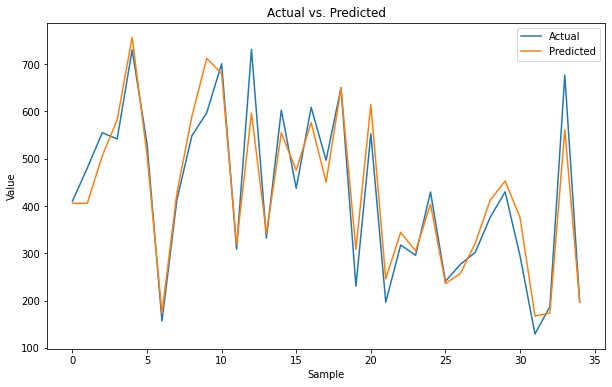

In [17]:
import matplotlib.pyplot as plt

def plot_comparison(y_pred, y_test):
    plt.figure(figsize=(10, 6))
    plt.plot(y_test, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.title('Actual vs. Predicted')
    plt.xlabel('Sample')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Example usage
# Replace y_pred and y_test with your actual data
# y_pred = [your predicted values]
# y_test = [your actual values]

plot_comparison(y_pred, y_test.values)
# plot_comparison()

### Saving the model and importing it into another file

In [18]:
# Save the model
model.save("my_model_1.h5")
